<a href="https://colab.research.google.com/github/ahmedshaik982/NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING/blob/main/Copy_of_NETFLIX_MOVIES_AND_TV_SHOWS_CLUSTERING.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Problem Statement**

This dataset consists of tv shows and movies available on Netflix as of 2019. The dataset is collected from Flixable which is a third-party Netflix search engine.

In 2018, they released an interesting report which shows that the number of TV shows on Netflix has nearly tripled since 2010. The streaming service’s number of movies has decreased by more than 2,000 titles since 2010, while its number of TV shows has nearly tripled. It will be interesting to explore what all other insights can be obtained from the same dataset.

Integrating this dataset with other external datasets such as IMDB ratings, rotten tomatoes can also provide many interesting findings.

## <b>In this  project, you are required to do </b>
1. Exploratory Data Analysis 

2. Understanding what type content is available in different countries

3. Is Netflix has increasingly focusing on TV rather than movies in recent years.
4. Clustering similar content by matching text-based features



# **Attribute Information**

1. show_id : Unique ID for every Movie / Tv Show

2. type : Identifier - A Movie or TV Show

3. title : Title of the Movie / Tv Show

4. director : Director of the Movie

5. cast : Actors involved in the movie / show

6. country : Country where the movie / show was produced

7. date_added : Date it was added on Netflix

8. release_year : Actual Releaseyear of the movie / show

9. rating : TV Rating of the movie / show

10. duration : Total Duration - in minutes or number of seasons

11. listed_in : Genere

12. description: The Summary description

In [237]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set(style = 'whitegrid')
import warnings
warnings.filterwarnings('ignore')
pd.options.display.float_format = '{:.5f}'.format


In [238]:
# Mounting drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [239]:
# Reading the data and displaying the top 5 rows of the data
data = pd.read_csv('/content/drive/My Drive/files/NETFLIX MOVIES AND TV SHOWS CLUSTERING.csv')
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%                NaN   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  
0  In a future where the elite inhabit an island ...  
1  After a devastating earthquake hits Mexico Cit...  
2  When an army recruit is found dead, his fellow...  
3  In a postapocalyptic world, rag-doll robots hi...  
4  A brilliant group of students become card-coun...

In [240]:
# SHape of the data
data.shape

(7787, 12)

In [241]:
# Getting Info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7787 entries, 0 to 7786
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       7787 non-null   object
 1   type          7787 non-null   object
 2   title         7787 non-null   object
 3   director      5398 non-null   object
 4   cast          7069 non-null   object
 5   country       7280 non-null   object
 6   date_added    7777 non-null   object
 7   release_year  7787 non-null   int64 
 8   rating        7780 non-null   object
 9   duration      7787 non-null   object
 10  listed_in     7787 non-null   object
 11  description   7787 non-null   object
dtypes: int64(1), object(11)
memory usage: 730.2+ KB


In [242]:
# Describe
data.describe()

release_year
count    7787.00000
mean     2013.93258
std         8.75739
min      1925.00000
25%      2013.00000
50%      2017.00000
75%      2018.00000
max      2021.00000

In [243]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2389
cast             718
country          507
date_added        10
release_year       0
rating             7
duration           0
listed_in          0
description        0
dtype: int64

In [244]:
# Checking for null values
null = data.isnull().sum().reset_index()
null['% of null values'] = null[0]/data.shape[0] *100
null.rename(columns = {'index':'feature', 0:'null values'}).sort_values(by = 'null values', ascending = False)

feature  null values  % of null values
3       director         2389          30.67934
4           cast          718           9.22050
5        country          507           6.51085
6     date_added           10           0.12842
8         rating            7           0.08989
0        show_id            0           0.00000
1           type            0           0.00000
2          title            0           0.00000
7   release_year            0           0.00000
9       duration            0           0.00000
10     listed_in            0           0.00000
11   description            0           0.00000

From the above dataframem we can see there are 5 features with null values. They are 


1.   director
2.   cast
2.   country
2.   date_added
2.   rating

*  For director column, we can replace the null values with 'unknown'
*  For cast column, we can replace the null values with 'unknown'
*  For country column, we can replace null values with most frequent value (mode)
*  For date_added column, we can drop the rows with null values
*  For rating column, we can drop the null values.


In [245]:
# Handling of null values
data['director'].fillna('unknown', inplace = True)
data['cast'].fillna('unknown', inplace = True)
data['country'].fillna((data['country'].mode()[0]), inplace = True)
data.dropna(inplace = True)


In [246]:
# Checking the null values after handling null values
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [247]:
# Columns of the data
col = data.columns
col

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [248]:
# Creating two dataframes seperately for TV Shows and Movies
movie_df = data[data['type'] == 'Movie']
tv_df = data[data['type'] == 'TV Show']

In [249]:
# Extracting duration of movies (for eg., here we will convert 10 min to 10)
def movie_dur(x):
  if x[-3:] == 'min':
    return int(x[:-4])
  else:
    return 0


data['movie_duration'] = data['duration'].apply(movie_dur)


In [250]:
# Extracting month number from date_added column
data['month_added'] = pd.DatetimeIndex(data['date_added']).month

In [251]:
# Extracting number of seasons of TV Shows from duration column (For eg., here we will convert '4 Seasons' to '4')
def num_of_seasons(x):
  if x[-7:] == 'Seasons':
    return int(x[:-8])
  elif x[-6:] == 'Season':
    return int(x[:-7])
  else:
    return 0
data['num_of_seasons'] = data['duration'].apply(num_of_seasons)

In [252]:
#Assigning the Ratings into grouped categories
ratings = {
    'TV-PG': 'Older Kids',
    'TV-MA': 'Adults',
    'TV-Y7-FV': 'Older Kids',
    'TV-Y7': 'Older Kids',
    'TV-14': 'Teens',
    'R': 'Adults',
    'TV-Y': 'Kids',
    'NR': 'Adults',
    'PG-13': 'Teens',
    'TV-G': 'Kids',
    'PG': 'Older Kids',
    'G': 'Kids',
    'UR': 'Adults',
    'NC-17': 'Adults'
}
data['target_ages'] = data['rating'].replace(ratings)

In [253]:
# type should be a category
data['type'] = pd.Categorical(data['type'])

# target_ages is another category (4 classes)
data['target_ages'] = pd.Categorical(data['target_ages'], categories=['Kids', 'Older Kids', 'Teens', 'Adults'])

In [254]:
# Inspecting the data
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  movie_duration  \
0  In a future where the elite inhabit an island ...               0   
1  After a devastating earthquake hits Mexico Cit...              93   
2  When an army recruit is found dead, his fellow...              78   
3  In a postapocalyptic world, rag-doll robots hi...              80   
4  A brilliant group of students become card-coun...             123   

   month_added  num_of_seasons target_ages  
0            8               4      Adults  
1           12               0      Adults  
2           12               0      Adults  
3           11               0       Teens  
4            1               0       Teens

In [255]:
# storing features with less categories in a variable 'less_cat'
# storing features with more categories in a variable 'more_cat'
less_cat = []
more_cat = []
for i in data.columns:
  if data[i].nunique() > 20 :
    more_cat.append(i)
  elif data[i].nunique() < 20 :
    less_cat.append(i)

In [256]:
# Features with more number of categories
more_cat

['show_id',
 'title',
 'director',
 'cast',
 'country',
 'date_added',
 'release_year',
 'duration',
 'listed_in',
 'description',
 'movie_duration']

In [257]:
# Features with less number of categories
less_cat

['type', 'rating', 'month_added', 'num_of_seasons', 'target_ages']

In [258]:
# Function which returns the multiple bar plots which helps to visualize the count of yes or no for heart risk (target variable) for each category of particular feature.
def comparison(feature):
  grouped_data = data.groupby([feature, 'type'])['title'].count().reset_index().rename(columns = {'title':'count'})


  movie = grouped_data[grouped_data['type'] == 'Movie']
  tv = grouped_data[grouped_data['type'] == 'TV Show']

  plt.figure(figsize = (20,6))
  width = 0.2  #assigning width

  # LOCATIONS TO PLOT
  movie_bar = np.arange(len(grouped_data[feature].unique()))
  tv_bar = [i+width for i in movie_bar]



  plt.bar(movie_bar, movie['count'], width = width, label = 'MOVIE', color = '#0069c0')
  plt.bar(tv_bar, tv['count'], width = width, label = 'TV SHOW', color = '#1fe074')


  plt.xticks(movie_bar+width + width/2 , movie[feature])
  plt.xlabel(feature)
  plt.ylabel('count')
  plt.title(f'Count of MOVIE and TV SHOW for each category of {feature}')
  plt.legend()
  plt.show()

### **Exploratory Data Analysis**

### 1.  **Type**

In [259]:
# Unique values of type column and their count
data['type'].value_counts()

Movie      5372
TV Show    2398
Name: type, dtype: int64

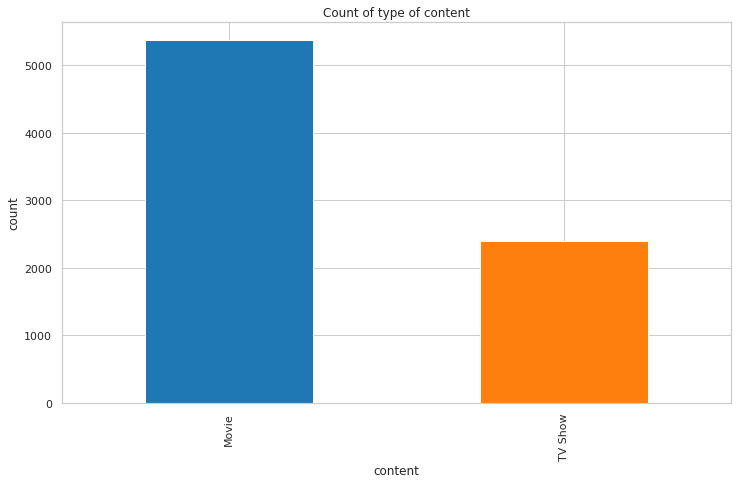

In [260]:
# Plotting different types of column 'type'
colors = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd',
          '#8c564b', '#e377c2', '#7f7f7f', '#bcbd22', '#17becf']
plt.figure(figsize = (12,7))
data['type'].value_counts().plot.bar(color = colors)
plt.xlabel('content')
plt.ylabel('count')
plt.title('Count of type of content')
plt.show()

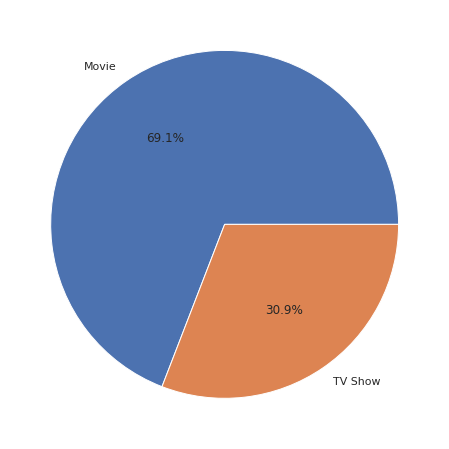

In [261]:
# Plotting pie chart of content types 
plt.figure(figsize = (8,8))
df_pie = data['type'].value_counts().reset_index()
plt.pie(df_pie['type'], labels = df_pie['index'], autopct='%1.1f%%')
plt.show()

From the above plot, we can observe that there are more movies that tv shows on netflix

### **2**.  **title**

In [262]:
# Unique values in title
data['title'].nunique()

7770

### **3.** **director**

In [263]:
movie_df[movie_df['director'] != 'unknown']['director'].value_counts()

Raúl Campos, Jan Suter           18
Marcus Raboy                     15
Jay Karas                        14
Cathy Garcia-Molina              13
Jay Chapman                      12
                                 ..
Elle Callahan                     1
Ana Kokkinos                      1
Timo Tjahjanto, Kimo Stamboel     1
Kelly Noonan                      1
Sam Dunn                          1
Name: director, Length: 3907, dtype: int64

In [264]:
# Top dierctors who directed the most number of movies
dir_df_m = movie_df[movie_df['director'] != 'unknown'].set_index('title').director.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
dir_df_m.value_counts().reset_index().rename(columns ={'index':'director', 0:'movies'})

director  movies
0               Jan Suter      18
1             Raúl Campos      18
2            Marcus Raboy      15
3               Jay Karas      15
4     Cathy Garcia-Molina      13
...                   ...     ...
4398      Stacia Crawford       1
4399        Shawn Arranha       1
4400              Liu Jie       1
4401      Yudai Yamaguchi       1
4402          Mozez Singh       1

[4403 rows x 2 columns]

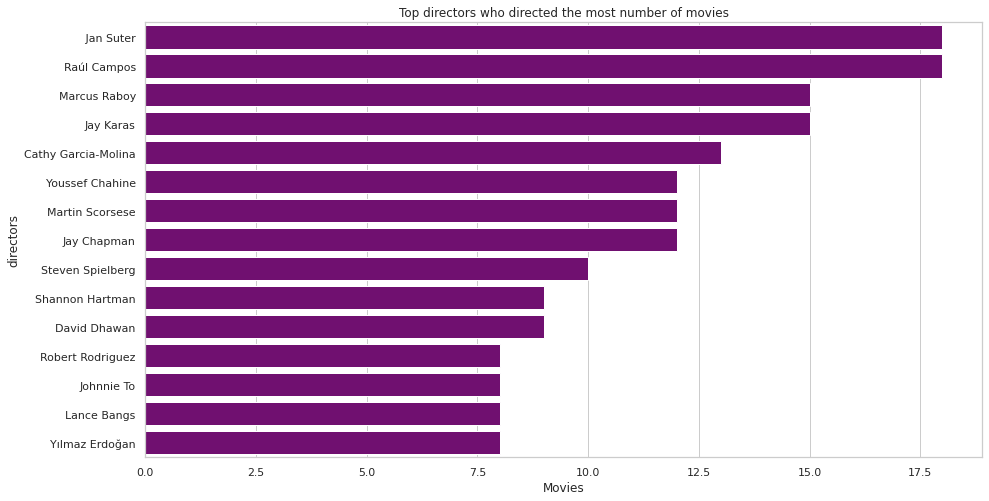

In [265]:
# Plotting above dataframe
plt.figure(figsize = (15, 8))
sns.countplot(y = dir_df_m, order=dir_df_m.value_counts().index[:15], color = 'purple')
plt.xlabel('Movies')
plt.ylabel('directors')
plt.title('Top directors who directed the most number of movies')
plt.show()

From the above visualizations, we can say that
*  Jan Suter and Raul Campos directed most number of movies.

In [266]:
# Top directors who directed the most number of TV Shows
dir_df_t = tv_df[tv_df['director'] != 'unknown'].set_index('title').director.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
dir_df_t.value_counts().reset_index().rename(columns ={'index':'director', 0:'movies'})

director  movies
0    Alastair Fothergill       3
1              Ken Burns       3
2         Iginio Straffi       2
3             Jung-ah Im       2
4            Shin Won-ho       2
..                   ...     ...
224         Ziad Doueiri       1
225           Seren Yüce       1
226          Stuart Orme       1
227         Dan Lucchesi       1
228   Lee Toland Krieger       1

[229 rows x 2 columns]

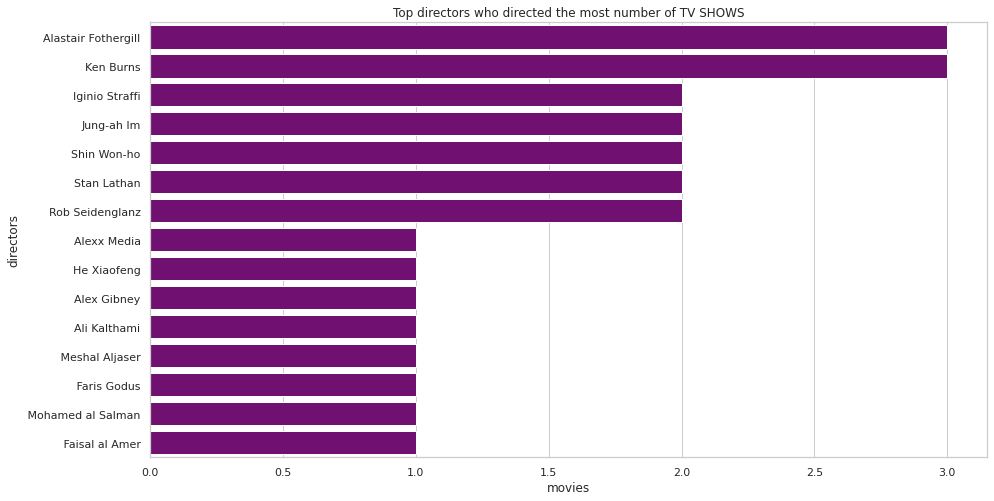

In [267]:
# Plotting above dataframe
plt.figure(figsize = (15, 8))
sns.countplot(y = dir_df_t, order=dir_df_t.value_counts().index[:15], color = 'purple')
plt.xlabel('movies')
plt.ylabel('directors')
plt.title('Top directors who directed the most number of TV SHOWS')
plt.show()

From the above visualizations, we can observe that 
*  Alastair Fothergill and Ken Burns directed most number of TV Shows.

### **4. cast**

In [268]:
# Top actors who acted in most number of movies
cast_df_m = movie_df[movie_df['cast'] != 'unknown'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
cast_df_m.value_counts().reset_index().rename(columns ={'index':'cast', 0:'movies'})

cast  movies
0           Anupam Kher      37
1        Shah Rukh Khan      27
2               Om Puri      27
3           Boman Irani      25
4          Paresh Rawal      24
...                 ...     ...
24718       Gina Carano       1
24719            Janset       1
24720   Ahmet Saraçoğlu       1
24721     Hatice Şendil       1
24722           Nasty C       1

[24723 rows x 2 columns]

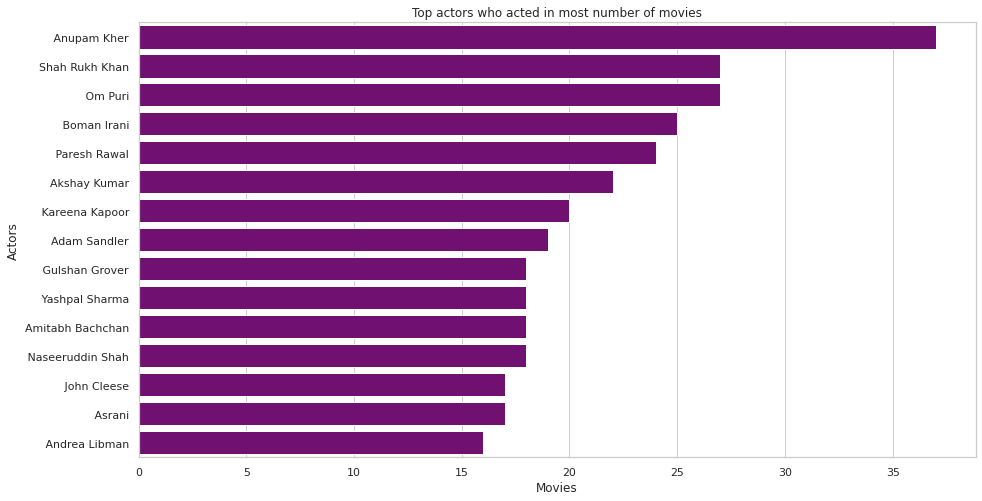

In [269]:
# Plotting above dataframe
plt.figure(figsize = (15, 8))
sns.countplot(y = cast_df_m, order=cast_df_m.value_counts().index[:15], color = 'purple')
plt.xlabel('Movies')
plt.ylabel('Actors')
plt.title('Top actors who acted in most number of movies')
plt.show()

From the above visualizations, we can observe that

*  Anupam Kher acted in  most number of movies followed by Shah Rukh Khan.

In [270]:
# Top actors who acted in most number of TV Shows
cast_df_t = tv_df[tv_df['cast'] != 'unknown'].set_index('title').cast.str.split(',', expand=True).stack().reset_index(level=1, drop=True)
cast_df_t.value_counts().reset_index().rename(columns ={'index':'cast', 0:'movies'})

cast  movies
0        Takahiro Sakurai      22
1          Junichi Suwabe      15
2               Yuki Kaji      15
3               Ai Kayano      15
4             Daisuke Ono      13
...                   ...     ...
14068     Severn Thompson       1
14069   Catherine Lemieux       1
14070         Anson Mount       1
14071              Common       1
14072         Rachel Khoo       1

[14073 rows x 2 columns]

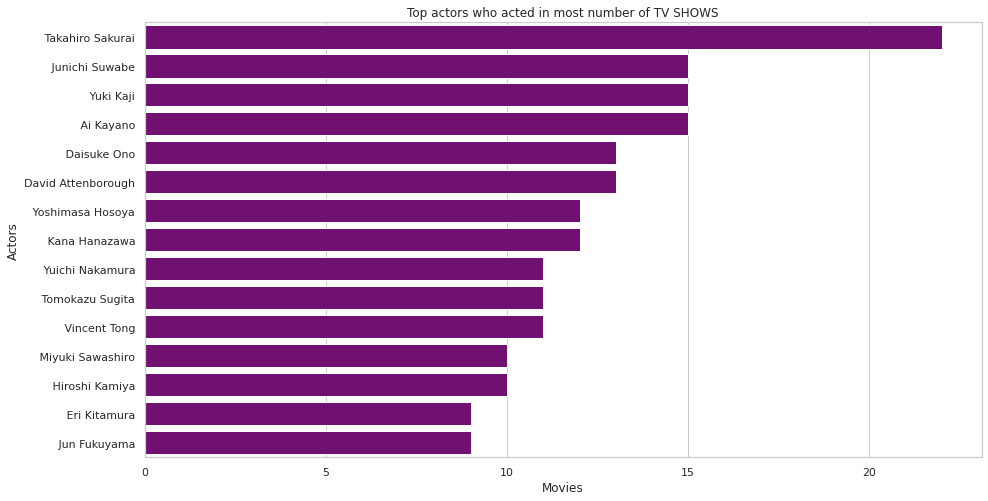

In [271]:
# Plotting above dataframe
plt.figure(figsize = (15, 8))
sns.countplot(y = cast_df_t, order=cast_df_t.value_counts().index[:15], color = 'purple')
plt.xlabel('Movies')
plt.ylabel('Actors')
plt.title('Top actors who acted in most number of TV SHOWS')
plt.show()

From the above visualizations, we can observe that 
*  Takahiro Sakurai	acted in most number of TV Shows followed by Junichi Suwabe

### **5. country**

In [272]:
# Creating a dataframe of number of movies w.r.t countries
con_df = data['country'].value_counts().reset_index().head(10).rename(columns = {'index': 'country', 'country':'movies'})
con_df

country  movies
0   United States    3051
1           India     923
2  United Kingdom     396
3           Japan     224
4     South Korea     183
5          Canada     177
6           Spain     134
7          France     115
8           Egypt     101
9          Turkey     100

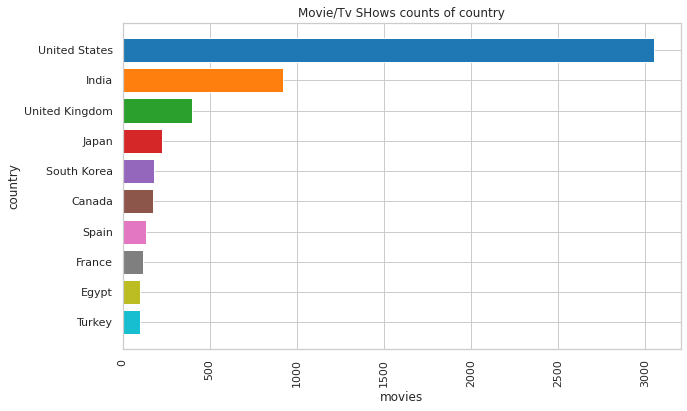

In [273]:
# Plotting the above dataframe
plt.figure(figsize = (10,6))
plt.barh(con_df['country'], con_df['movies'], color = colors)
plt.title('Movie/Tv SHows counts of country')
plt.xlabel('movies')
plt.ylabel('country')
plt.xticks(rotation = 90)
ax = plt.gca()
ax.invert_yaxis()
plt.show()

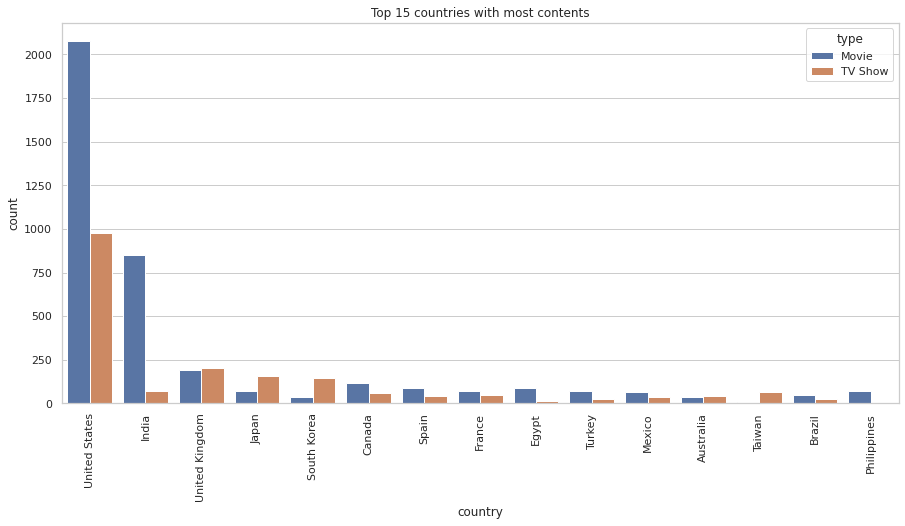

In [274]:
# Visualization of Movies and TV shows w.r.t to top15 countries
plt.figure(figsize=(15,7))
sns.countplot(x=data['country'],order=data['country'].value_counts().index[0:15],hue=data['type'])
plt.xticks(rotation=90)
plt.title('Top 15 countries with most contents')
plt.show()

From the above dataframe and visualizations, we can say the United Stated produced most number of movies/Tv Shows followed by India.

**date_added**

### **6. month_added**

In [275]:
# Creating a dataframe of number of movies/ TV SHows w.r.t months
mon_df = data['month_added'].value_counts().reset_index().head(10).rename(columns = {'index': 'month', 'month_added':'movies'})
mon_df

month  movies
0     12     832
1     10     785
2      1     756
3     11     738
4      3     668
5      9     618
6      8     617
7      7     600
8      4     600
9      5     543

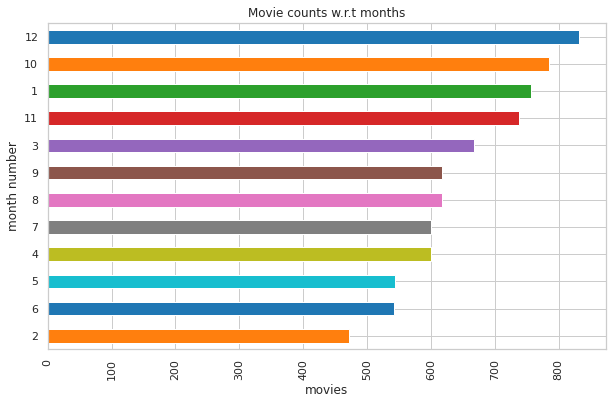

In [276]:
# Plotting the above dataframe
plt.figure(figsize = (10,6))
data['month_added'].value_counts().plot.barh(color = colors).invert_yaxis()
plt.title('Movie counts w.r.t months')
plt.xlabel('movies')
plt.ylabel('month number')
plt.xticks(rotation = 90)
plt.show()

Here we can observe that most number of movies/tv shows are released in the month of december.

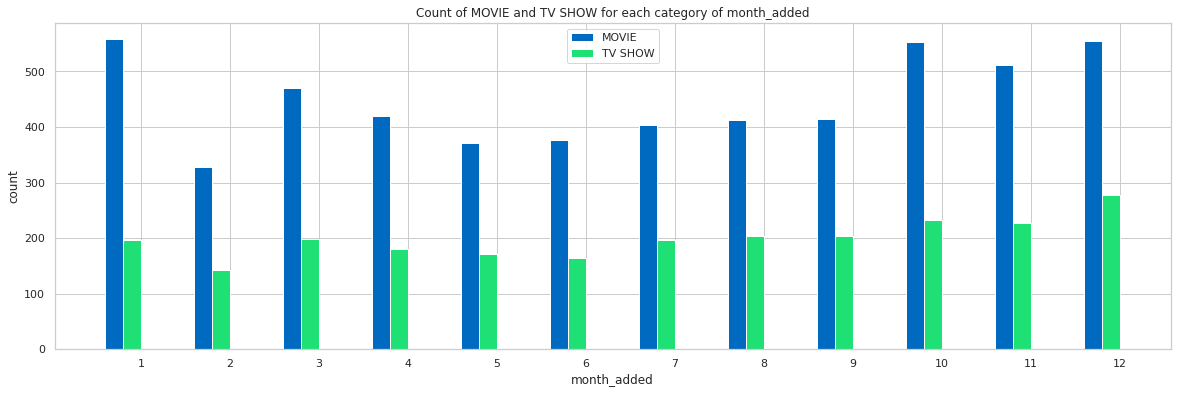

In [277]:
# count of movies and tv shows w.r.t each month
comparison('month_added')

From the above observations, we can observe that most number of movies are released in the month of december and january.

### **7. release_year**

In [278]:
# Creating a dataframe of number of movies/TV Shows w.r.t release_year
year_df = data['release_year'].value_counts().reset_index().head(15).rename(columns = {'index': 'release_year', 'release_year':'movies'})
year_df

release_year  movies
0           2018    1120
1           2017    1010
2           2019     996
3           2016     881
4           2020     868
5           2015     536
6           2014     334
7           2013     265
8           2012     218
9           2010     171
10          2011     166
11          2009     137
12          2008     124
13          2007      85
14          2006      85

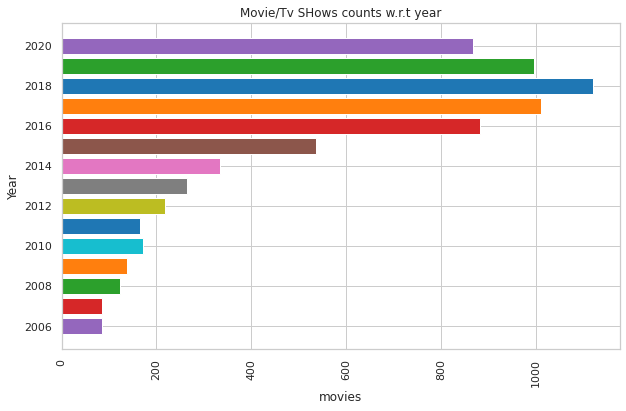

In [279]:
# plotting above dataframe
plt.figure(figsize = (10,6))
plt.barh(year_df['release_year'], year_df['movies'], color = colors)
plt.title('Movie/Tv SHows counts w.r.t year')
plt.xlabel('movies')
plt.ylabel('Year')
plt.xticks(rotation = 90)
plt.show()

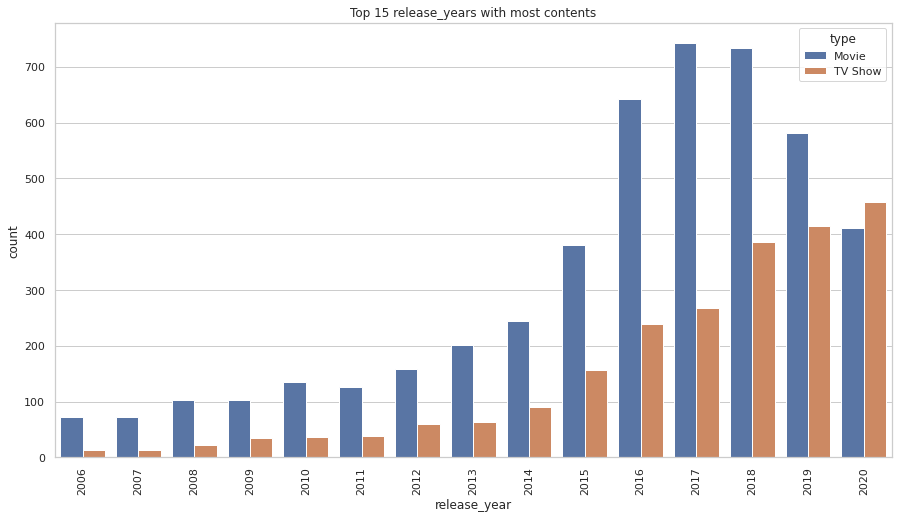

In [280]:
#Analysing top15 release_year with most content 
plt.figure(figsize=(15,8))
sns.countplot(x=data['release_year'],order=data['release_year'].value_counts().index[0:15].sort_values(),hue=data['type'])
plt.xticks(rotation=90)
plt.title('Top 15 release_years with most contents')
plt.show()

From the above dataframe and Visualizations we can say that
*  In the year 2018 most number of movies and TV Shows are released.
*  In the recent years, netflix has started to increase the TV Shows content as you can see the graph is increasing gradually.

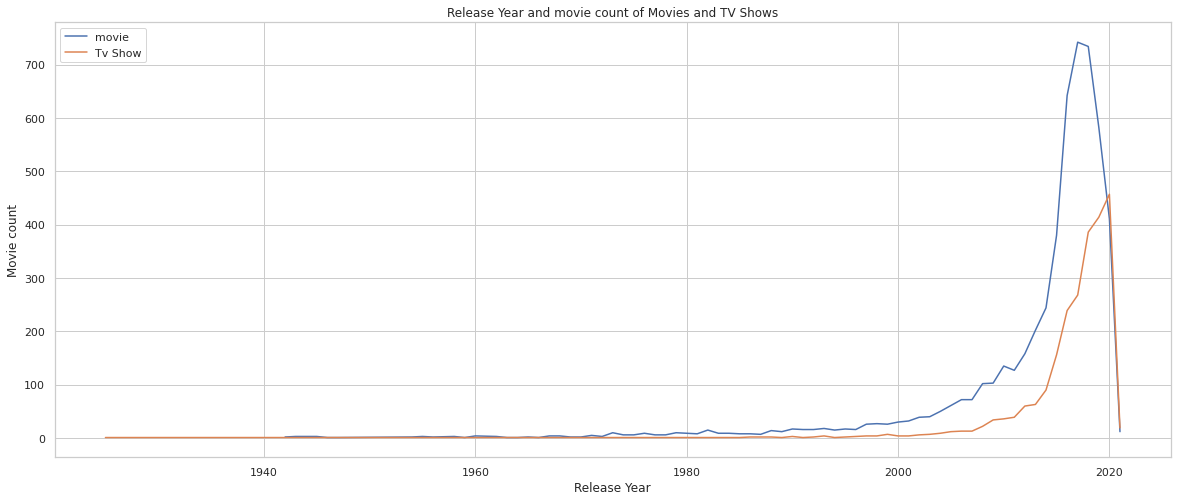

In [281]:
# Plotting number of movies and TV Shows w.r.t release_year
plt.figure(figsize = (20,8))
movie_df['release_year'].value_counts().sort_index(ascending=False).plot()
tv_df['release_year'].value_counts().sort_index(ascending=False).plot()
plt.xlabel('Release Year')
plt.ylabel('Movie count')
plt.title('Release Year and movie count of Movies and TV Shows')
plt.legend(['movie', 'Tv Show'])

plt.show()


### **8.  rating**

In [282]:
# Creating a dataframe of number of movies/TV Shows w.r.t rating
rat_df = data['rating'].value_counts().reset_index().rename(columns = {'index': 'rating', 'rating':'movies'})
rat_df

rating  movies
0      TV-MA    2861
1      TV-14    1928
2      TV-PG     804
3          R     665
4      PG-13     386
5       TV-Y     279
6      TV-Y7     270
7         PG     247
8       TV-G     194
9         NR      83
10         G      39
11  TV-Y7-FV       6
12        UR       5
13     NC-17       3

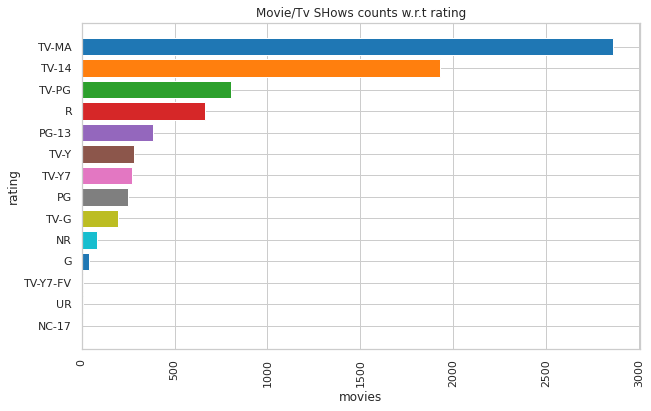

In [283]:
# Plotting above dataframe
plt.figure(figsize = (10,6))
plt.barh(rat_df['rating'], rat_df['movies'], color = colors)
plt.title('Movie/Tv SHows counts w.r.t rating')
plt.xlabel('movies')
plt.ylabel('rating')
ax = plt.gca()
ax.invert_yaxis()
plt.xticks(rotation = 90)
plt.show()

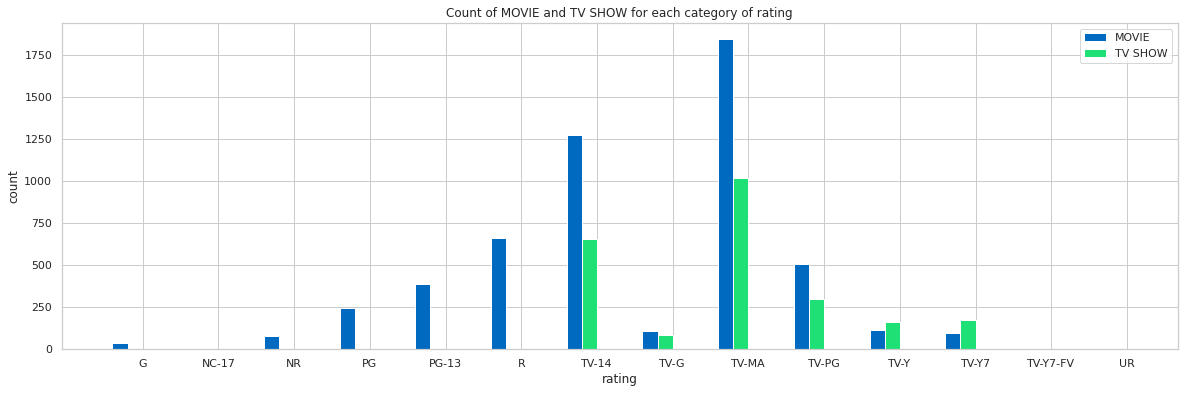

In [284]:
# comparision of count of movies and tv shows w.r.t rating
comparison('rating')

Here, we can say that most number of movies and TV SHows belongs the rating category of 'TV-MA' 

### **9.  listed_in**

In [285]:
# Creating a dataframe of number of movies/TV Shows w.r.t listed_in
list_df = data['listed_in'].value_counts().reset_index().head(10).rename(columns = {'index': 'listed_in', 'listed_in':'movies'})
list_df

listed_in  movies
0                                     Documentaries     334
1                                   Stand-Up Comedy     321
2                      Dramas, International Movies     320
3            Comedies, Dramas, International Movies     243
4  Dramas, Independent Movies, International Movies     215
5                                          Kids' TV     204
6                          Children & Family Movies     177
7               Documentaries, International Movies     172
8                Children & Family Movies, Comedies     169
9                    Comedies, International Movies     161

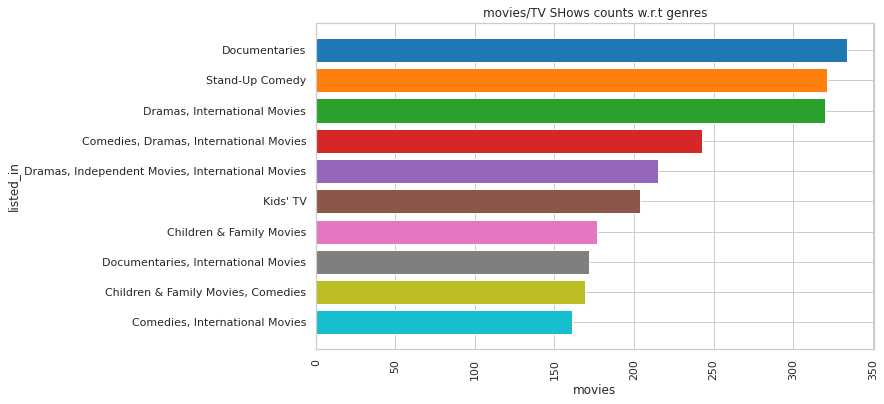

In [286]:
# Plotting above dataframe
plt.figure(figsize = (10,6))
plt.barh(list_df['listed_in'], list_df['movies'], color = colors)
plt.title('movies/TV SHows counts w.r.t genres')
plt.xlabel('movies')
plt.ylabel('listed_in')
ax = plt.gca()
ax.invert_yaxis()
plt.xticks(rotation = 90)
plt.show()

In [287]:
# Extracting unique genres from 'listed_in' column and creating a dataframe
unique_genres = data.set_index('title').listed_in.str.split(', ', expand=True).stack().reset_index(level=1, drop=True)
unique_genres

title
3%                                         International TV Shows
3%                                                      TV Dramas
3%                                            TV Sci-Fi & Fantasy
7:19                                                       Dramas
7:19                                         International Movies
                                                    ...          
Zulu Man in Japan                                Music & Musicals
Zumbo's Just Desserts                      International TV Shows
Zumbo's Just Desserts                                  Reality TV
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS             Documentaries
ZZ TOP: THAT LITTLE OL' BAND FROM TEXAS          Music & Musicals
Length: 17042, dtype: object

In [288]:
# Unique genres and their movies/TV SHow count
unique_genres.value_counts().reset_index()

index     0
0           International Movies  2437
1                         Dramas  2105
2                       Comedies  1471
3         International TV Shows  1197
4                  Documentaries   786
5             Action & Adventure   721
6                      TV Dramas   703
7             Independent Movies   673
8       Children & Family Movies   532
9                Romantic Movies   531
10                   TV Comedies   517
11                     Thrillers   491
12                Crime TV Shows   426
13                      Kids' TV   411
14                    Docuseries   352
15             Romantic TV Shows   333
16               Stand-Up Comedy   329
17              Music & Musicals   321
18                 Horror Movies   312
19              British TV Shows   231
20                    Reality TV   222
21              Sci-Fi & Fantasy   218
22                 Sports Movies   196
23               Korean TV Shows   150
24         TV Action & Adventure   149
25                  Anime Series   146
26     Spanish-Language TV Shows   146
27                Classic Movies   103
28                  LGBTQ Movies    90
29                  TV Mysteries    90
30           Science & Nature TV    85
31           TV Sci-Fi & Fantasy    75
32                     TV Horror    69
33                 Teen TV Shows    60
34                   Cult Movies    59
35          Faith & Spirituality    57
36                Anime Features    57
37                        Movies    52
38  Stand-Up Comedy & Talk Shows    52
39                  TV Thrillers    50
40             Classic & Cult TV    25
41                      TV Shows    12

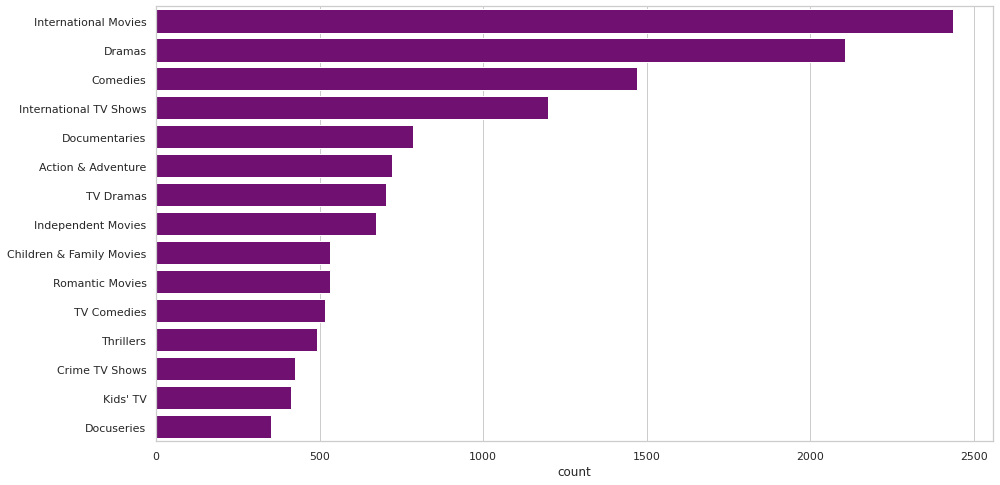

In [289]:
# Plotting top 15 genres with most number of movies/TV Shows
plt.figure(figsize = (15, 8))
sns.countplot(y = unique_genres, order=unique_genres.value_counts().index[:15], color = 'purple')
plt.show()

From the above visualization, we can observe that most number of movies / TV Shows are from genre of 'International Movies' followed by dramas.

### **10.  movie_duration**

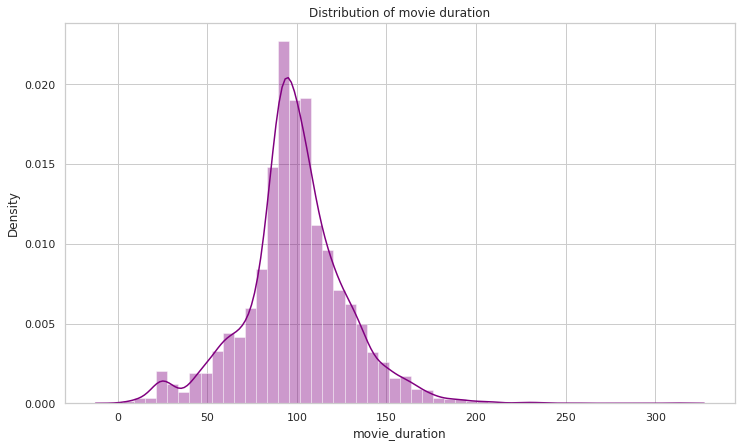

In [290]:
# Distribution of movie duration 
plt.figure(figsize = (12, 7))
sns.distplot(data[data['movie_duration'] != 0]['movie_duration'], color = 'purple')
plt.title('Distribution of movie duration')
plt.show()


From the above distribution plot, we can observe that 
*  Most number of movie duration is in the range of 80 to 125 min.

### **11. num_of_seasons**

In [291]:
# Creating a dataframe of number of TV Shows w.r.t number of seasons
seas_df = data['num_of_seasons'].value_counts().reset_index()[1:].rename(columns = {'index': 'num_of_seasons', 'num_of_seasons':'movies'})
seas_df

num_of_seasons  movies
1                1    1606
2                2     378
3                3     183
4                4      86
5                5      57
6                6      30
7                7      19
8                8      18
9                9       8
10              10       5
11              11       2
12              12       2
13              15       2
14              13       1
15              16       1

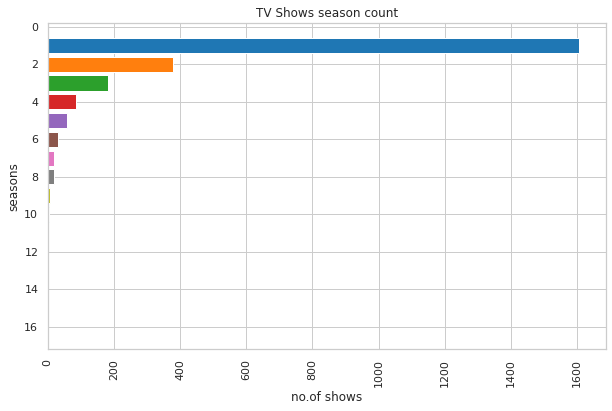

In [292]:
# Plotting above dataframe
plt.figure(figsize = (10,6))
plt.barh(seas_df['num_of_seasons'], seas_df['movies'], color = colors)
plt.title('TV Shows season count')
plt.xlabel('no.of shows')
plt.ylabel('seasons')
ax = plt.gca()
ax.invert_yaxis()
plt.xticks(rotation = 90)
plt.show()

Here, we can observe that most number of TV Shows have only One season.

### **12.  target_ages**

In [293]:
# Creating a dataframe of number of movies/TV Shows w.r.t 'target_ages'
tar_df = data['target_ages'].value_counts().reset_index().rename(columns = {'index': 'target_ages', 'target_ages':'movies'})
tar_df

target_ages  movies
0      Adults    3617
1       Teens    2314
2  Older Kids    1327
3        Kids     512

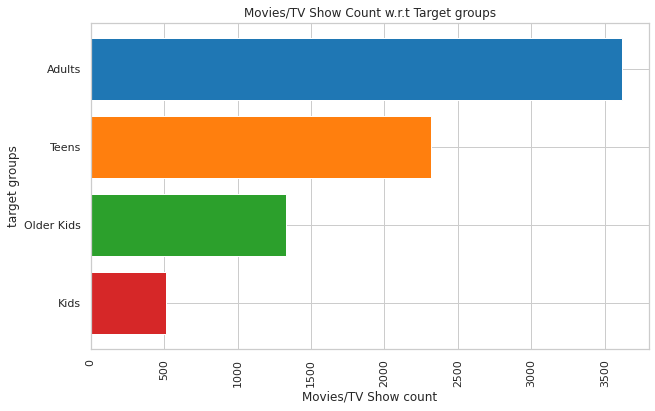

In [294]:
# Plotting above dataframe
plt.figure(figsize = (10,6))
plt.barh(tar_df['target_ages'], tar_df['movies'], color = colors)
plt.title('Movies/TV Show Count w.r.t Target groups')
plt.xlabel('Movies/TV Show count')
plt.ylabel('target groups')
ax = plt.gca()
ax.invert_yaxis()
plt.xticks(rotation = 90)
plt.show()

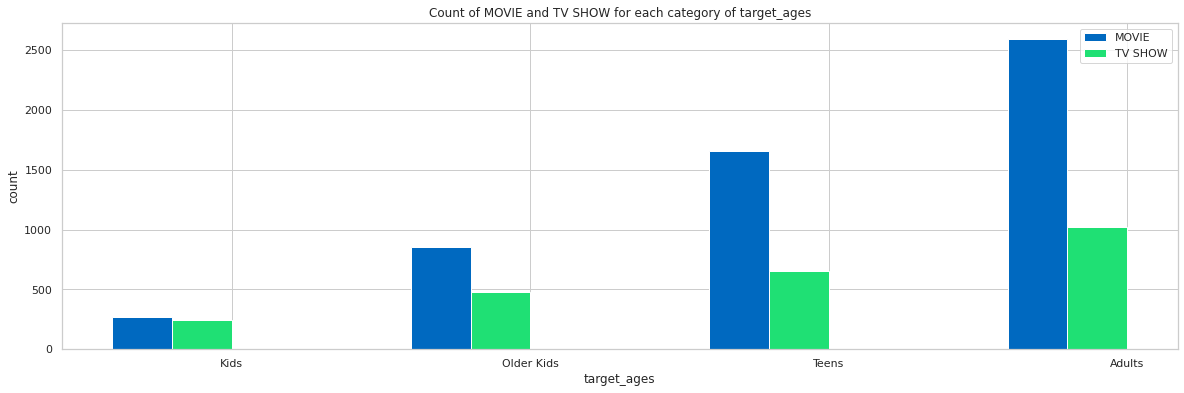

In [295]:
# comparision of count of movies and tv shows w.r.t target groups
comparison('target_ages')

Here, we can observe that most number of movies and TV Shows are made for adults only.

In [296]:
# Defining a function which takes two features as input and plots the heatmap between those features
def heatmap_between_two_feature(feature1, feature2):
  coun_df = data.groupby([feature1, feature2])['type'].count().reset_index()
  con_df = data[feature1].value_counts().reset_index().head(10).rename(columns = {'index': feature1, feature1:'movies'})
  df_heat = data.loc[data[feature1].isin(con_df[feature1])]
  df_heatmap = pd.crosstab(df_heat[feature1], df_heat[feature2], normalize= 'index')
  plt.figure(figsize = (12,8))
  sns.heatmap(df_heatmap, annot = True, cmap = 'BuPu',fmt='1.0%', linewidth=2.5)
  plt.show()

**Lets observe how countries made content w.r.t age groups**

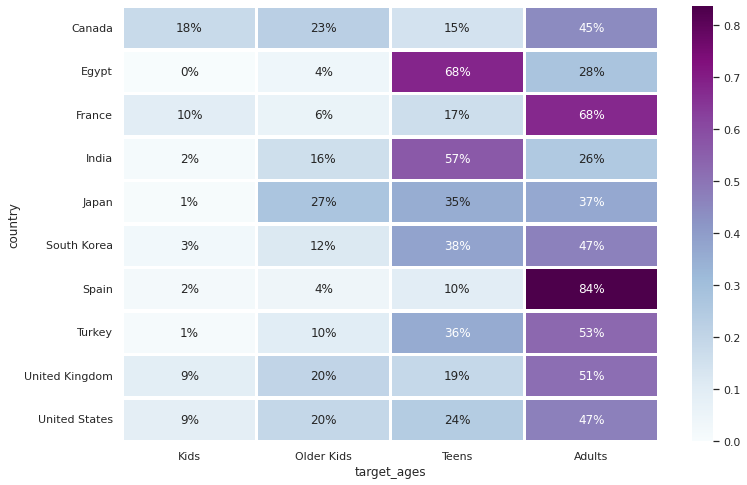

In [297]:
# Lets observe how countries made content w.r.t age groups
heatmap_between_two_feature('country', 'target_ages')

**Observations :**
*  The content for Adults is mostly made from Spain and France countries
*  The content for Teens is mostly made from Egypt and India countries.
*  The content for Older Kids is mostly made from Japan country.
*  The content for Kids is mostly made from Canada country


**Lets observe released year wise content w.r.t age groups**

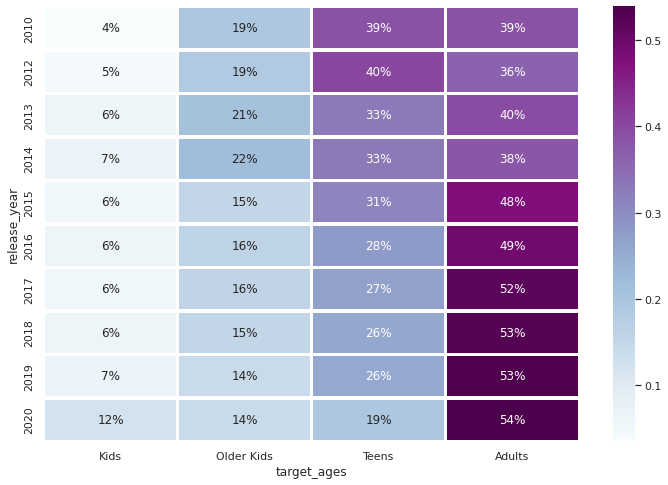

In [298]:
# 
heatmap_between_two_feature('release_year', 'target_ages')

**Observations :**
*  The content for Adults is mostly released in recent years(2020, 2019, 2018, 2017) .
*  The content for Teens is mostly released in the year 2010 and 2012
*  The content for Older is Kids released in year of 2014.
*  The content for Kids is mostly released in the year of 2020.


**Lets observe how genres and age groups are related**

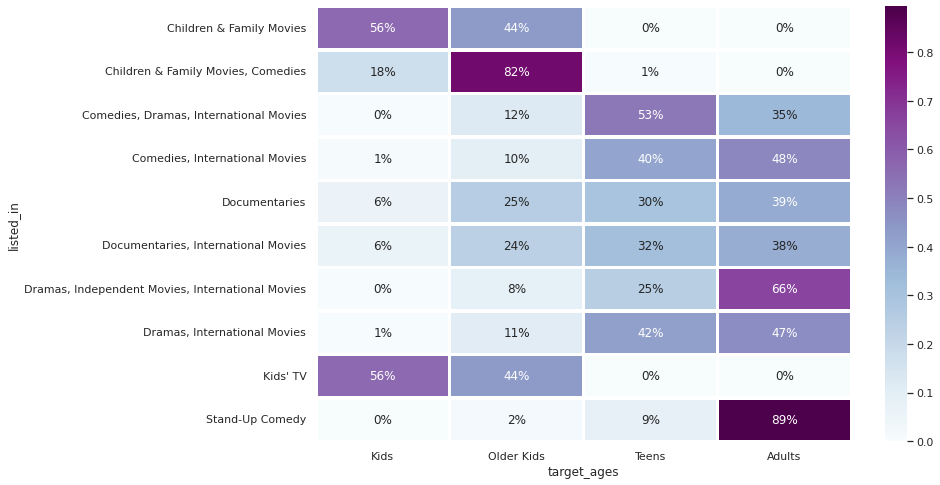

In [299]:
# Lets observe how genres and age groups are related
heatmap_between_two_feature('listed_in', 'target_ages')

**Observations :**
*  The content for Adults is mostly from the genre of '**stand up comedy**' followed by **Dramas**.
*  The content for Teens is mostly from the genre of '**Comedies, Dramas, international movies**'
*  The content for Older Kids is mostly from the genre of '**Children, Family movies and Comedies**'
*  The content for Kids is mostly from the genre of **Kids TV** and **Children and Family Movies**


**Lets observe how directors made content w.r.t age groups**

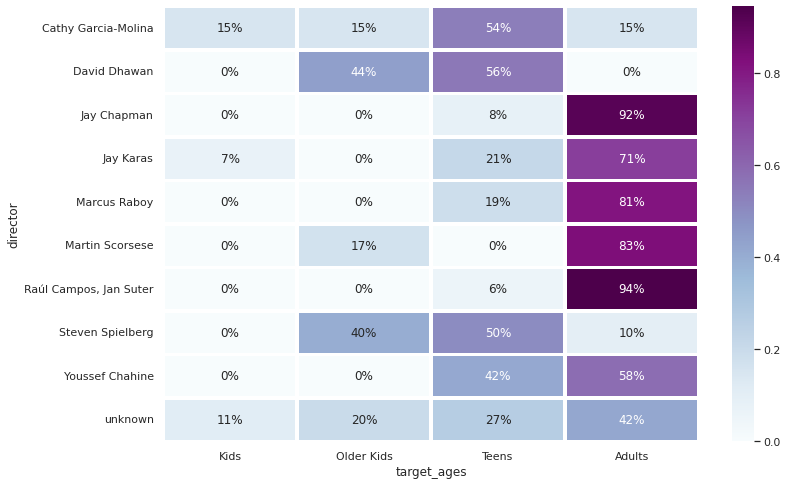

In [300]:
# Lets observe how directors made content w.r.t age groups
heatmap_between_two_feature('director', 'target_ages')

**Observations :**
*  94% content from Raul Campos and Jan Suter is for adults
*  Steven Spielberg , David Dhawan and Cathy Garcia-Molina are the directors who makes content mostly for Teens and Older Kids.


In [301]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  movie_duration  \
0  In a future where the elite inhabit an island ...               0   
1  After a devastating earthquake hits Mexico Cit...              93   
2  When an army recruit is found dead, his fellow...              78   
3  In a postapocalyptic world, rag-doll robots hi...              80   
4  A brilliant group of students become card-coun...             123   

   month_added  num_of_seasons target_ages  
0            8               4      Adults  
1           12               0      Adults  
2           12               0      Adults  
3           11               0       Teens  
4            1               0       Teens

**Lets find the similar movies using description with cosine similarity**

In [302]:
# Importing necessary libraries
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity
from difflib import get_close_matches
import difflib

# Function which takes movie name and number (how many similar movies you want) and prints the similar movies
def similar_movie(movie_name, top_n):
  req_df = data[['title', 'description']]
  vectorizer = TfidfVectorizer()
  vec = vectorizer.fit_transform(req_df['description'])
  similarity = cosine_similarity(vec)
  all_titles = req_df['title'].tolist()
  close_match = difflib.get_close_matches(movie_name, all_titles)
  index_of_the_movie = req_df[req_df.title == close_match[0]].index[0]
  similarity_score = list(enumerate(similarity[index_of_the_movie]))
  sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
  x = sorted_similar_movies[0:top_n]
  print(f'The similar movies for movie {movie_name} are')
  top_n_movies = []
  for i in x: 
    top_n_movies.append(i[0])
  for j in top_n_movies:
    print(req_df['title'][j])

In [303]:
similar_movie('Catch Me If You Can', 10)

The similar movies for movie Catch Me If You Can are
Catch Me If You Can
Love Dot Com: The Social Experiment
Minnaminugu the FireFly
9 Months That Made You
Sadece Sen
A Second Chance
The Promised Neverland
Riverdale
Miss India
Headwinds


In [304]:
# creating  a word cloud (what words are mostly repeated)
from wordcloud import WordCloud, STOPWORDS
text = ''
sw = set(STOPWORDS)

for name in data['title']:
  name = str(name)
  letters = name.split()

  for i in range(len(letters)):
    letters[i] = letters[i].lower()
  text = text + ' '.join(letters) + ' '
  

In [305]:
# Creating a function which takes name of column as input and plots the word cloud image (what words are mostly repeated)
from wordcloud import WordCloud, STOPWORDS
def wordImage(feature):
  text = ''
  sw = set(STOPWORDS)
  for name in data[feature]:
    name = str(name)
    letters = name.split()
    for l in range(len(letters)):
      letters[l] = letters[l].lower()
    text = text + ' '.join(letters) + ' '
  cloud = WordCloud().generate(text)
  plt.figure(figsize = (15, 10))
  plt.title(f'Most used words in {feature}', fontsize = 24)
  plt.imshow(cloud)

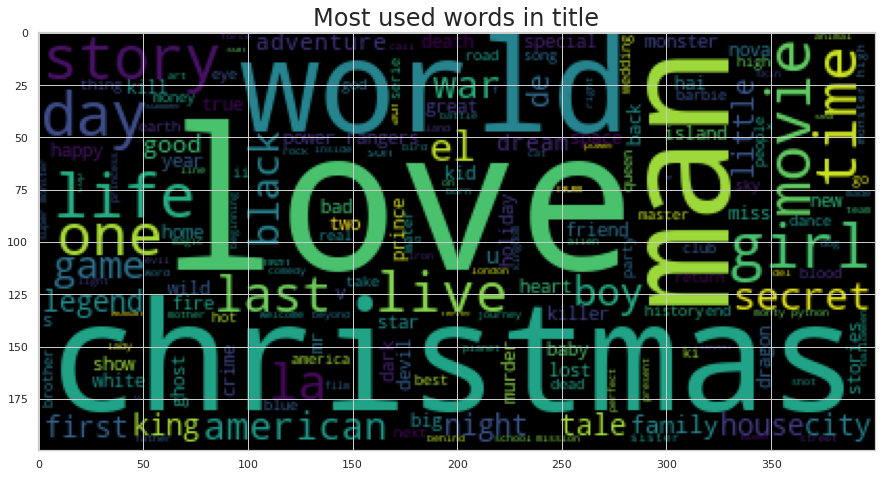

In [306]:
# Lets observe what are the words repeated mostly in the 'title' column
wordImage('title')

Here, we can observe the most repeated words are 
*  christmas
*  love
*  girl
*  man
*  story
*  life
*  world

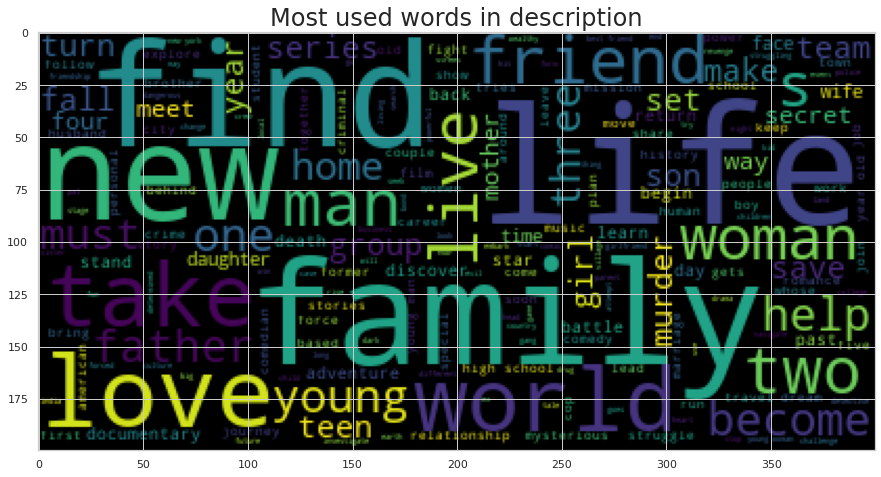

In [307]:
# Lets observe what are the words repeated mostly in the 'description' column
wordImage('description')

Here, we can observe the most repeated words are 
*  life
*  family
*  find
*  woman
*  love
*  take
*  world
*  live
*  two
*  friend 

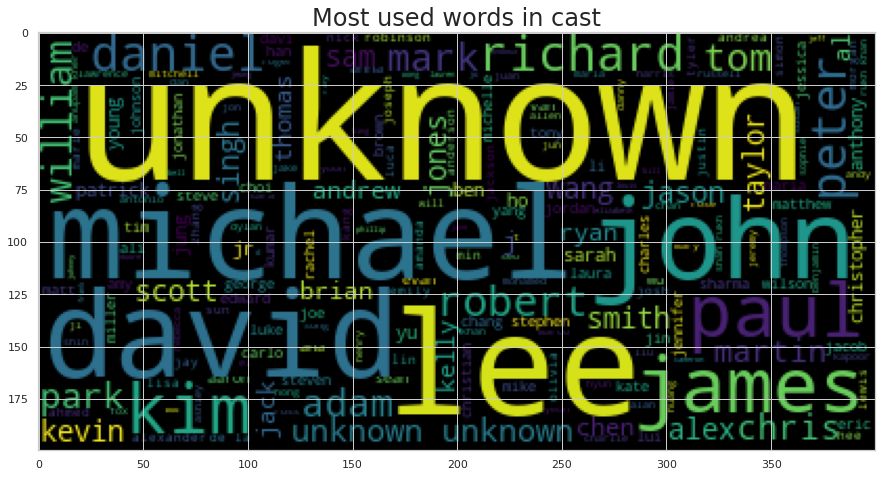

In [308]:
# Lets observe what are the words repeated mostly in the 'cast' column
wordImage('cast')

other than unknown , the most repeated words in cast column are
*  david
*  michael
*  lee
*  john
*  peter
*  james
*  robert
*  paul 

In [309]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  movie_duration  \
0  In a future where the elite inhabit an island ...               0   
1  After a devastating earthquake hits Mexico Cit...              93   
2  When an army recruit is found dead, his fellow...              78   
3  In a postapocalyptic world, rag-doll robots hi...              80   
4  A brilliant group of students become card-coun...             123   

   month_added  num_of_seasons target_ages  
0            8               4      Adults  
1           12               0      Adults  
2           12               0      Adults  
3           11               0       Teens  
4            1               0       Teens

In [310]:
text_features = ['title','type', 'director', 'cast',  'country', 'rating' ,'listed_in', 'description']

In [311]:
data['type'] = data['type'].astype(str)

In [312]:
data['combined_column'] = (data['type'] + ' ' + data['director'] + ' ' + data['cast'] + ' ' + data['country'] + ' ' + data['rating'] + ' ' + data['listed_in'] + ' ' + data['description'])

In [313]:
data.head()

show_id     type  title           director  \
0      s1  TV Show     3%            unknown   
1      s2    Movie   7:19  Jorge Michel Grau   
2      s3    Movie  23:59       Gilbert Chan   
3      s4    Movie      9        Shane Acker   
4      s5    Movie     21     Robert Luketic   

                                                cast        country  \
0  João Miguel, Bianca Comparato, Michel Gomes, R...         Brazil   
1  Demián Bichir, Héctor Bonilla, Oscar Serrano, ...         Mexico   
2  Tedd Chan, Stella Chung, Henley Hii, Lawrence ...      Singapore   
3  Elijah Wood, John C. Reilly, Jennifer Connelly...  United States   
4  Jim Sturgess, Kevin Spacey, Kate Bosworth, Aar...  United States   

          date_added  release_year rating   duration  \
0    August 14, 2020          2020  TV-MA  4 Seasons   
1  December 23, 2016          2016  TV-MA     93 min   
2  December 20, 2018          2011      R     78 min   
3  November 16, 2017          2009  PG-13     80 min   
4    January 1, 2020          2008  PG-13    123 min   

                                           listed_in  \
0  International TV Shows, TV Dramas, TV Sci-Fi &...   
1                       Dramas, International Movies   
2                Horror Movies, International Movies   
3  Action & Adventure, Independent Movies, Sci-Fi...   
4                                             Dramas   

                                         description  movie_duration  \
0  In a future where the elite inhabit an island ...               0   
1  After a devastating earthquake hits Mexico Cit...              93   
2  When an army recruit is found dead, his fellow...              78   
3  In a postapocalyptic world, rag-doll robots hi...              80   
4  A brilliant group of students become card-coun...             123   

   month_added  num_of_seasons target_ages  \
0            8               4      Adults   
1           12               0      Adults   
2           12               0      Adults   
3           11               0       Teens   
4            1               0       Teens   

                                     combined_column  
0  TV Show unknown João Miguel, Bianca Comparato,...  
1  Movie Jorge Michel Grau Demián Bichir, Héctor ...  
2  Movie Gilbert Chan Tedd Chan, Stella Chung, He...  
3  Movie Shane Acker Elijah Wood, John C. Reilly,...  
4  Movie Robert Luketic Jim Sturgess, Kevin Space...

In [314]:
data.drop(['show_id', 'director', 'cast', 'listed_in', 'description'], axis = 1, inplace = True)

In [315]:
data.set_index('title', inplace = True)

In [316]:
data.drop('date_added', axis = 1, inplace = True)

In [317]:
data.drop('duration', axis = 1, inplace = True)

In [318]:
data.head()

type        country  release_year rating  movie_duration  \
title                                                                
3%     TV Show         Brazil          2020  TV-MA               0   
7:19     Movie         Mexico          2016  TV-MA              93   
23:59    Movie      Singapore          2011      R              78   
9        Movie  United States          2009  PG-13              80   
21       Movie  United States          2008  PG-13             123   

       month_added  num_of_seasons target_ages  \
title                                            
3%               8               4      Adults   
7:19            12               0      Adults   
23:59           12               0      Adults   
9               11               0       Teens   
21               1               0       Teens   

                                         combined_column  
title                                                     
3%     TV Show unknown João Miguel, Bianca Comparato,...  
7:19   Movie Jorge Michel Grau Demián Bichir, Héctor ...  
23:59  Movie Gilbert Chan Tedd Chan, Stella Chung, He...  
9      Movie Shane Acker Elijah Wood, John C. Reilly,...  
21     Movie Robert Luketic Jim Sturgess, Kevin Space...

In [319]:
data.reset_index(inplace = True)

In [320]:
def similar_movie_2(movie_name, top_n):
  req_df = data[['title', 'combined_column']]
  vectorizer = TfidfVectorizer()
  vec = vectorizer.fit_transform(req_df['combined_column'])
  similarity = cosine_similarity(vec)
  all_titles = req_df['title'].tolist()
  close_match = difflib.get_close_matches(movie_name, all_titles)
  index_of_the_movie = req_df[req_df.title == close_match[0]].index[0]
  similarity_score = list(enumerate(similarity[index_of_the_movie]))
  sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
  x = sorted_similar_movies[0:top_n]
  print(f'The similar movies for movie {movie_name} are')
  top_n_movies = []
  for i in x: 
    top_n_movies.append(i[0])
  for j in top_n_movies:
    print(req_df['title'][j])

In [321]:
similar_movie_2('Breaking Bad', 10)

The similar movies for movie Breaking Bad are
Breaking Bad
Better Call Saul
The Show
Girlfriend's Day
W/ Bob & David
Get Shorty
Furthest Witness
Have You Ever Fallen in Love, Miss Jiang?
Trumbo
Extracurricular


In [322]:
data.head()

title     type        country  release_year rating  movie_duration  \
0     3%  TV Show         Brazil          2020  TV-MA               0   
1   7:19    Movie         Mexico          2016  TV-MA              93   
2  23:59    Movie      Singapore          2011      R              78   
3      9    Movie  United States          2009  PG-13              80   
4     21    Movie  United States          2008  PG-13             123   

   month_added  num_of_seasons target_ages  \
0            8               4      Adults   
1           12               0      Adults   
2           12               0      Adults   
3           11               0       Teens   
4            1               0       Teens   

                                     combined_column  
0  TV Show unknown João Miguel, Bianca Comparato,...  
1  Movie Jorge Michel Grau Demián Bichir, Héctor ...  
2  Movie Gilbert Chan Tedd Chan, Stella Chung, He...  
3  Movie Shane Acker Elijah Wood, John C. Reilly,...  
4  Movie Robert Luketic Jim Sturgess, Kevin Space...

In [323]:
df = data.copy()

In [324]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

**Tokenizing**

In [325]:
from nltk.tokenize import word_tokenize
def token(sentence):
  words = word_tokenize(sentence)
  return ' '.join(words)
df['combined_column'] = df['combined_column'].apply(token)

In [326]:
df.head()

title     type        country  release_year rating  movie_duration  \
0     3%  TV Show         Brazil          2020  TV-MA               0   
1   7:19    Movie         Mexico          2016  TV-MA              93   
2  23:59    Movie      Singapore          2011      R              78   
3      9    Movie  United States          2009  PG-13              80   
4     21    Movie  United States          2008  PG-13             123   

   month_added  num_of_seasons target_ages  \
0            8               4      Adults   
1           12               0      Adults   
2           12               0      Adults   
3           11               0       Teens   
4            1               0       Teens   

                                     combined_column  
0  TV Show unknown João Miguel , Bianca Comparato...  
1  Movie Jorge Michel Grau Demián Bichir , Héctor...  
2  Movie Gilbert Chan Tedd Chan , Stella Chung , ...  
3  Movie Shane Acker Elijah Wood , John C. Reilly...  
4  Movie Robert Luketic Jim Sturgess , Kevin Spac...

**Lower Casing**

In [327]:
def lower_case(words):
  return words.lower()
df['combined_column'] = df['combined_column'].apply(lower_case)

In [328]:
df.head()

title     type        country  release_year rating  movie_duration  \
0     3%  TV Show         Brazil          2020  TV-MA               0   
1   7:19    Movie         Mexico          2016  TV-MA              93   
2  23:59    Movie      Singapore          2011      R              78   
3      9    Movie  United States          2009  PG-13              80   
4     21    Movie  United States          2008  PG-13             123   

   month_added  num_of_seasons target_ages  \
0            8               4      Adults   
1           12               0      Adults   
2           12               0      Adults   
3           11               0       Teens   
4            1               0       Teens   

                                     combined_column  
0  tv show unknown joão miguel , bianca comparato...  
1  movie jorge michel grau demián bichir , héctor...  
2  movie gilbert chan tedd chan , stella chung , ...  
3  movie shane acker elijah wood , john c. reilly...  
4  movie robert luketic jim sturgess , kevin spac...

**Removing Stopwords**

In [329]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [330]:
import nltk
nltk.download('stopwords')
import string
from nltk.corpus import stopwords
sw = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [331]:
punc = [i for i in string.punctuation]

In [332]:
def purify_text(text):
  nopunc_lst = [c for c in text if c not in punc]
  no_punc_sent  = ''.join(nopunc_lst)
  words = no_punc_sent.split()
  no_sw_lst = [w for w in words if w not in sw]
  no_sw_sent = ' '.join(no_sw_lst)
  return no_sw_sent

In [333]:
df['tokenize_text'] = data['combined_column'].apply(purify_text)

In [334]:
df.head()

title     type        country  release_year rating  movie_duration  \
0     3%  TV Show         Brazil          2020  TV-MA               0   
1   7:19    Movie         Mexico          2016  TV-MA              93   
2  23:59    Movie      Singapore          2011      R              78   
3      9    Movie  United States          2009  PG-13              80   
4     21    Movie  United States          2008  PG-13             123   

   month_added  num_of_seasons target_ages  \
0            8               4      Adults   
1           12               0      Adults   
2           12               0      Adults   
3           11               0       Teens   
4            1               0       Teens   

                                     combined_column  \
0  tv show unknown joão miguel , bianca comparato...   
1  movie jorge michel grau demián bichir , héctor...   
2  movie gilbert chan tedd chan , stella chung , ...   
3  movie shane acker elijah wood , john c. reilly...   
4  movie robert luketic jim sturgess , kevin spac...   

                                       tokenize_text  
0  TV Show unknown João Miguel Bianca Comparato M...  
1  Movie Jorge Michel Grau Demián Bichir Héctor B...  
2  Movie Gilbert Chan Tedd Chan Stella Chung Henl...  
3  Movie Shane Acker Elijah Wood John C Reilly Je...  
4  Movie Robert Luketic Jim Sturgess Kevin Spacey...

In [335]:
df['tokenize_text'] = df['tokenize_text'].apply(lower_case)

In [336]:
df.head()

title     type        country  release_year rating  movie_duration  \
0     3%  TV Show         Brazil          2020  TV-MA               0   
1   7:19    Movie         Mexico          2016  TV-MA              93   
2  23:59    Movie      Singapore          2011      R              78   
3      9    Movie  United States          2009  PG-13              80   
4     21    Movie  United States          2008  PG-13             123   

   month_added  num_of_seasons target_ages  \
0            8               4      Adults   
1           12               0      Adults   
2           12               0      Adults   
3           11               0       Teens   
4            1               0       Teens   

                                     combined_column  \
0  tv show unknown joão miguel , bianca comparato...   
1  movie jorge michel grau demián bichir , héctor...   
2  movie gilbert chan tedd chan , stella chung , ...   
3  movie shane acker elijah wood , john c. reilly...   
4  movie robert luketic jim sturgess , kevin spac...   

                                       tokenize_text  
0  tv show unknown joão miguel bianca comparato m...  
1  movie jorge michel grau demián bichir héctor b...  
2  movie gilbert chan tedd chan stella chung henl...  
3  movie shane acker elijah wood john c reilly je...  
4  movie robert luketic jim sturgess kevin spacey...

**stemmimg**

In [337]:
import nltk
from nltk.stem import PorterStemmer
ps = PorterStemmer()

def stemm(words):
  stem_words = []
  for word in words.split():
    stem_words.append(ps.stem(word))
  return ' '.join(stem_words)

df['tokenize_text'] = df['tokenize_text'].apply(stemm)

In [338]:
df.head()

title     type        country  release_year rating  movie_duration  \
0     3%  TV Show         Brazil          2020  TV-MA               0   
1   7:19    Movie         Mexico          2016  TV-MA              93   
2  23:59    Movie      Singapore          2011      R              78   
3      9    Movie  United States          2009  PG-13              80   
4     21    Movie  United States          2008  PG-13             123   

   month_added  num_of_seasons target_ages  \
0            8               4      Adults   
1           12               0      Adults   
2           12               0      Adults   
3           11               0       Teens   
4            1               0       Teens   

                                     combined_column  \
0  tv show unknown joão miguel , bianca comparato...   
1  movie jorge michel grau demián bichir , héctor...   
2  movie gilbert chan tedd chan , stella chung , ...   
3  movie shane acker elijah wood , john c. reilly...   
4  movie robert luketic jim sturgess , kevin spac...   

                                       tokenize_text  
0  tv show unknown joão miguel bianca comparato m...  
1  movi jorg michel grau demián bichir héctor bon...  
2  movi gilbert chan tedd chan stella chung henle...  
3  movi shane acker elijah wood john c reilli jen...  
4  movi robert luket jim sturgess kevin spacey ka...

In [339]:
def similar_movie_3(movie_name, top_n):
  req_df = df[['title', 'tokenize_text']]
  vectorizer = TfidfVectorizer()
  vec = vectorizer.fit_transform(req_df['tokenize_text'])
  similarity = cosine_similarity(vec)
  all_titles = req_df['title'].tolist()
  close_match = difflib.get_close_matches(movie_name, all_titles)
  index_of_the_movie = req_df[req_df.title == close_match[0]].index[0]
  similarity_score = list(enumerate(similarity[index_of_the_movie]))
  sorted_similar_movies = sorted(similarity_score, key = lambda x:x[1], reverse = True) 
  x = sorted_similar_movies[0:top_n]
  print(f'The similar movies for movie {movie_name} are')
  top_n_movies = []
  for i in x: 
    top_n_movies.append(i[0])
  for j in top_n_movies:
    print(req_df['title'][j])

In [340]:
similar_movie_3('Breaking Bad', 10)

The similar movies for movie Breaking Bad are
Breaking Bad
Better Call Saul
The Show
Have You Ever Fallen in Love, Miss Jiang?
My Life My Story
Dancing Angels
Killer Ratings
The School Nurse Files
Pyaar Tune Kya Kiya
Hormones


In [341]:
similar_movie_3('stranger things', 10)

The similar movies for movie stranger things are
Stranger Things
Beyond Stranger Things
Prank Encounters
The Umbrella Academy
Kiss Me First
Anjaan: Special Crimes Unit
Reckoning
The OA
Disappearance
The 4400


In [342]:
vector = TfidfVectorizer()
x = vector.fit_transform(df['tokenize_text'])

## **K Means Clustering**

In [344]:
from sklearn.decomposition import PCA
pca = PCA(n_components = 2)
X_pca = pd.DataFrame(pca.fit_transform(x.toarray()))

In [345]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1,50):
  kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 0)
  kmeans.fit(X_pca)
  wcss.append(kmeans.inertia_)

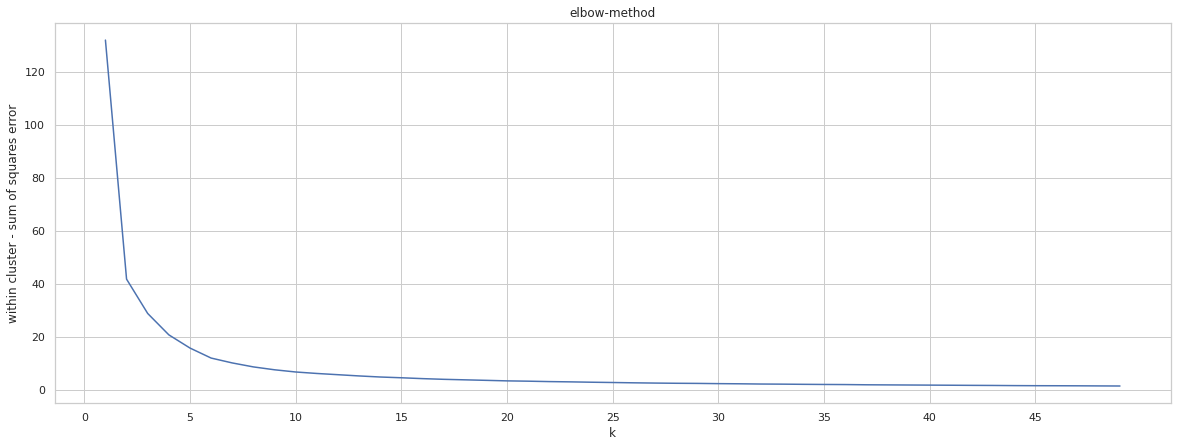

In [346]:
plt.figure(figsize = (20,7))
k = range(1,50)
plt.plot(range(1,50), wcss)
plt.xlabel('k')
plt.ylabel('within cluster - sum of squares error')
plt.title('elbow-method')
plt.xticks(np.arange(0, max(k)+1, 5.0))
plt.show()

In [347]:
import matplotlib.cm as cm

In [348]:
X_pca.shape

(7770, 2)

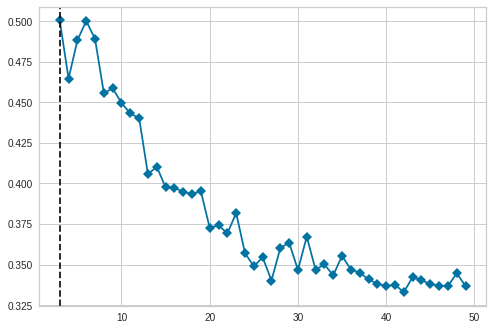

In [349]:
from yellowbrick.cluster import KElbowVisualizer
model = KMeans()
visualizer = KElbowVisualizer(
    model, k=(3,50), metric='silhouette', timings=False, locate_elbow=True
)

visualizer.fit(X_pca) 
plt.show()

In [350]:
from sklearn.cluster import KMeans

In [351]:
from sklearn.metrics import silhouette_score, silhouette_samples
import matplotlib.cm as cm

For n_clusters = 2 The average silhouette_score is : 0.6539997301308026
For n_clusters = 3 The average silhouette_score is : 0.5004807054225332
For n_clusters = 4 The average silhouette_score is : 0.4644716656973972
For n_clusters = 5 The average silhouette_score is : 0.4881668275077137
For n_clusters = 6 The average silhouette_score is : 0.5001759759427156
For n_clusters = 7 The average silhouette_score is : 0.4890834204754704
For n_clusters = 8 The average silhouette_score is : 0.4554082526748286
For n_clusters = 9 The average silhouette_score is : 0.45878979059535635
For n_clusters = 10 The average silhouette_score is : 0.4529842559528958
For n_clusters = 15 The average silhouette_score is : 0.3954179421236398
For n_clusters = 18 The average silhouette_score is : 0.3764326484142373
For n_clusters = 20 The average silhouette_score is : 0.3748726485846049
For n_clusters = 25 The average silhouette_score is : 0.3516683389444526


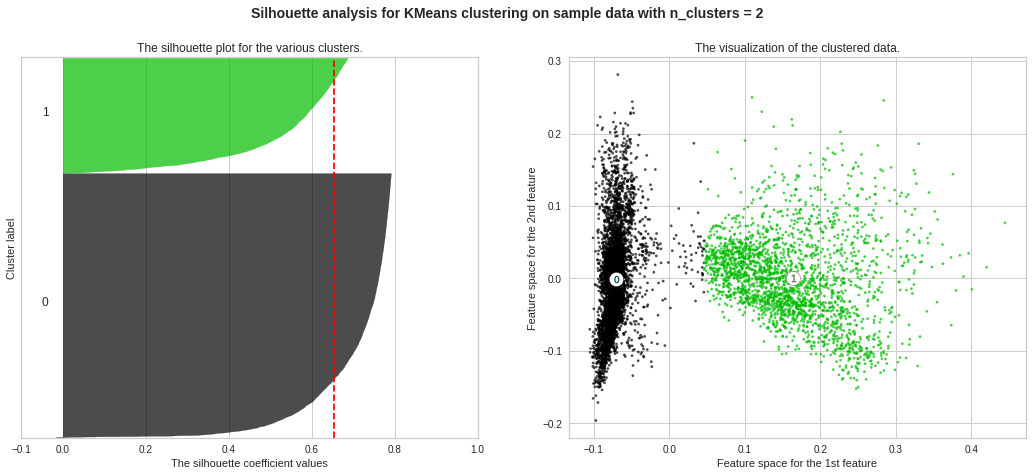

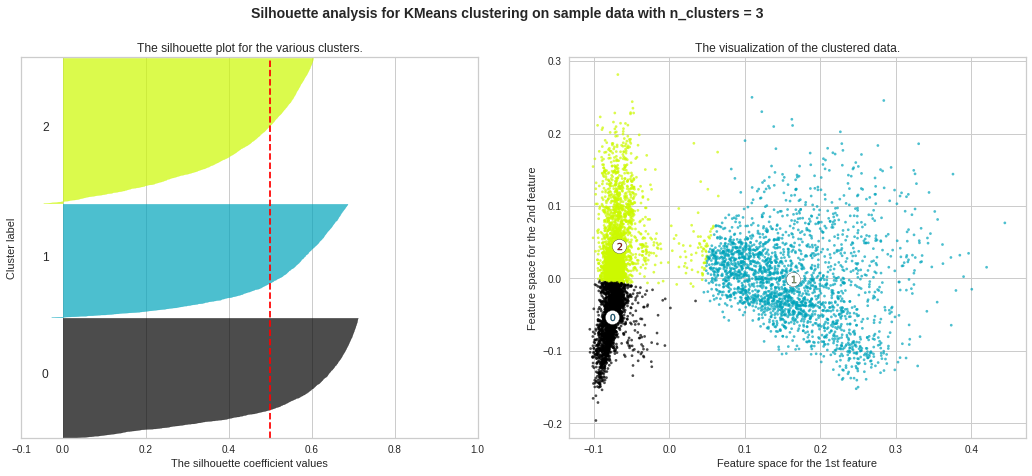

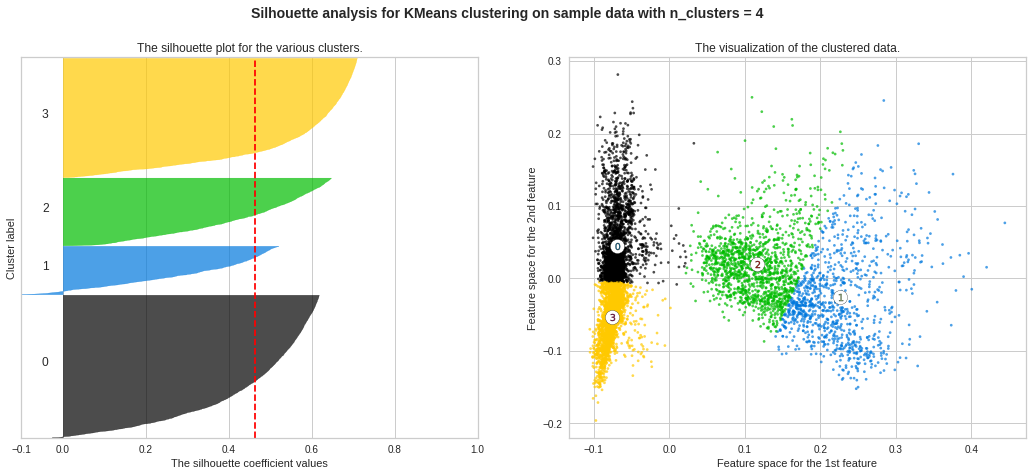

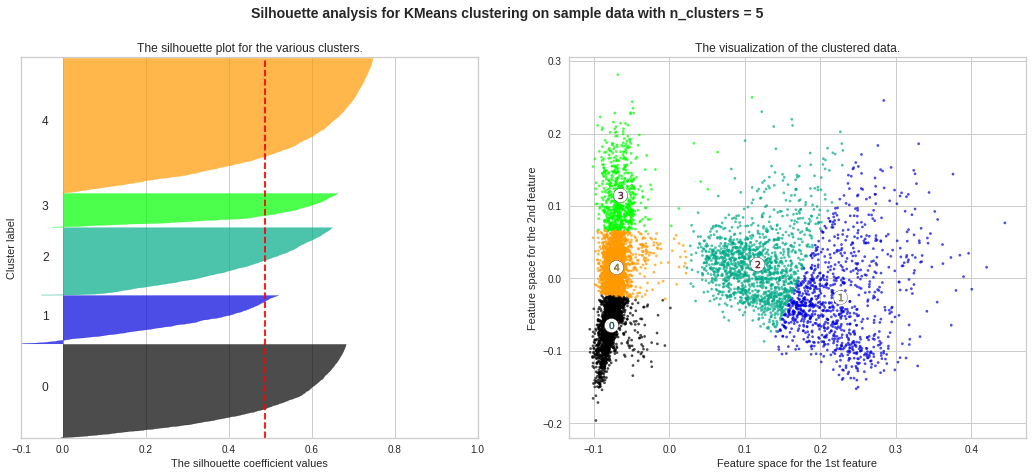

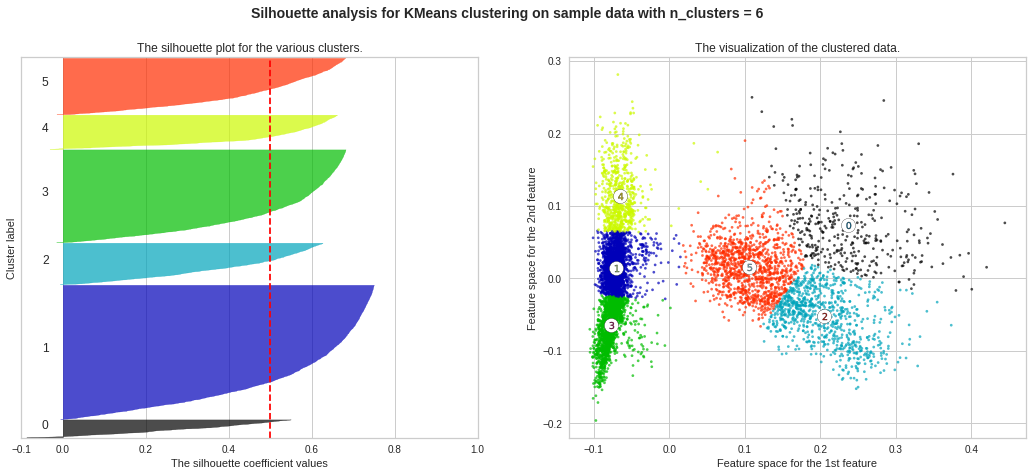

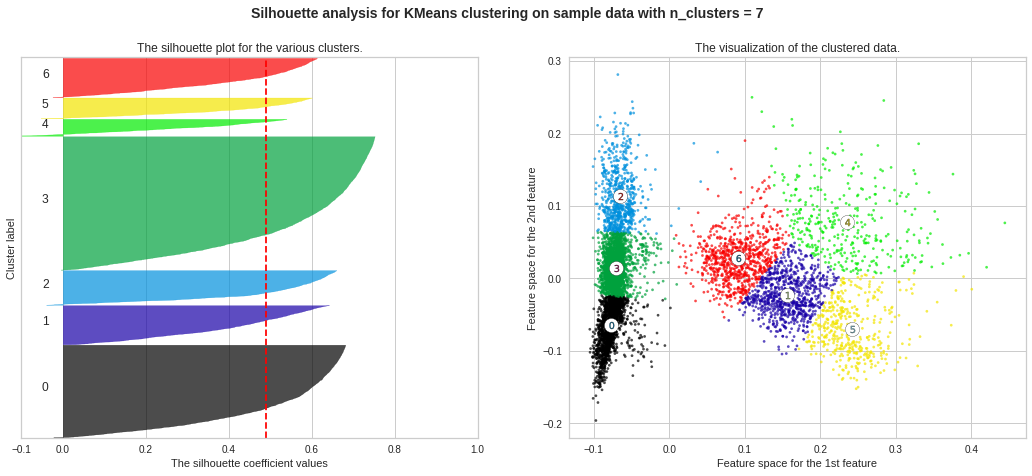

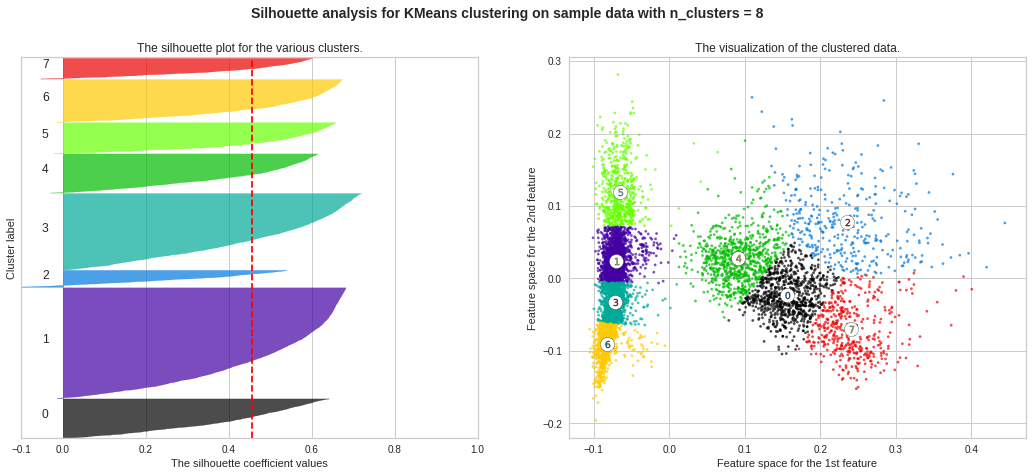

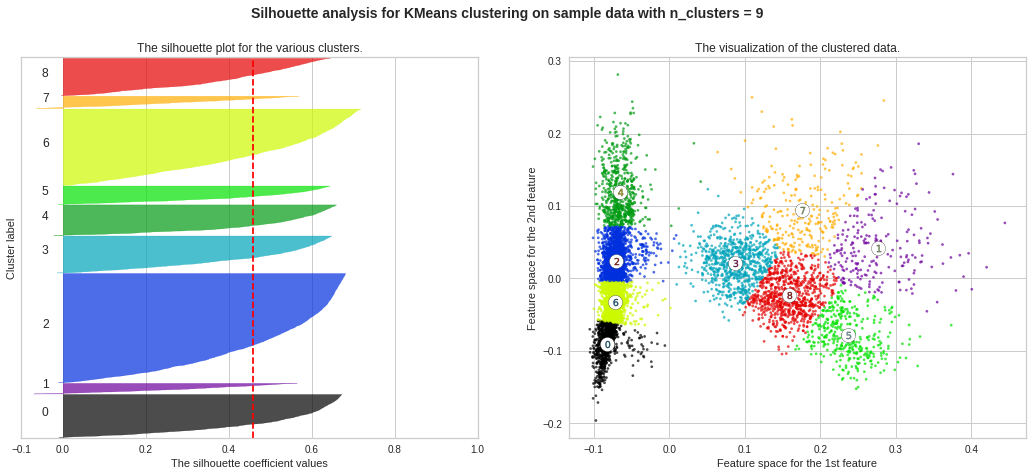

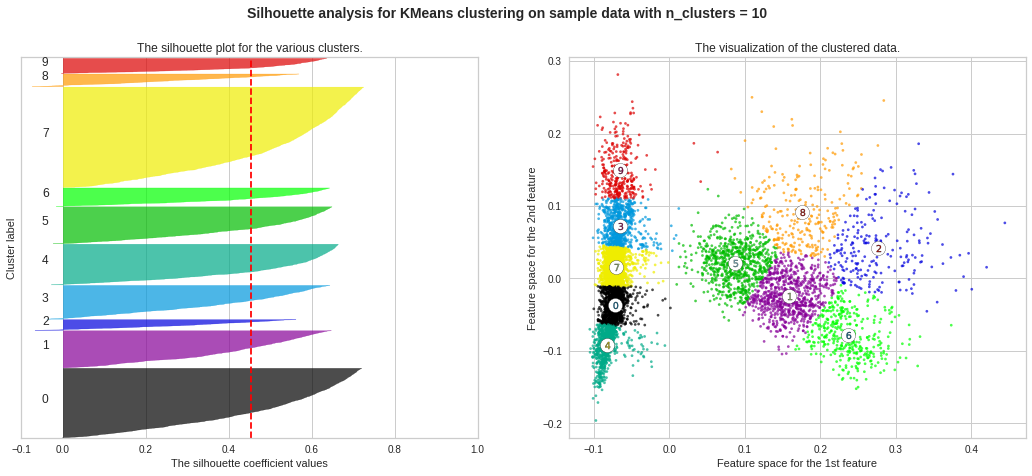

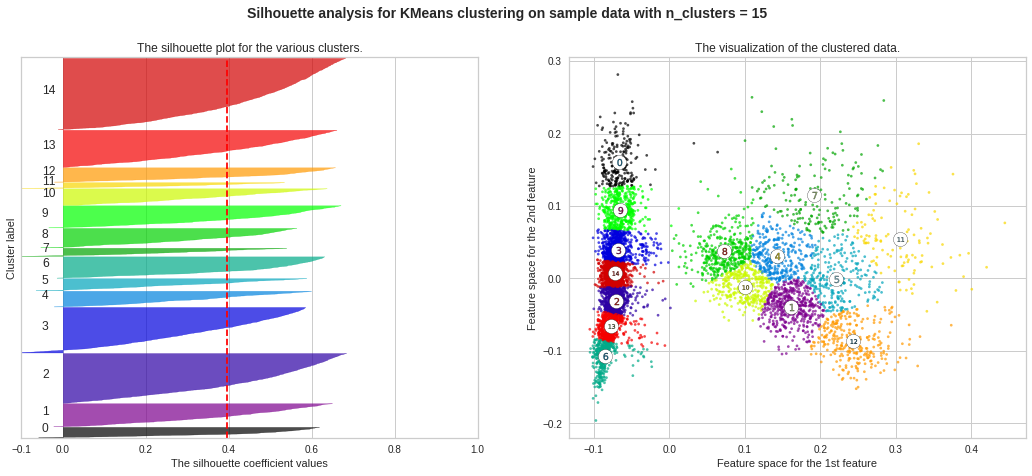

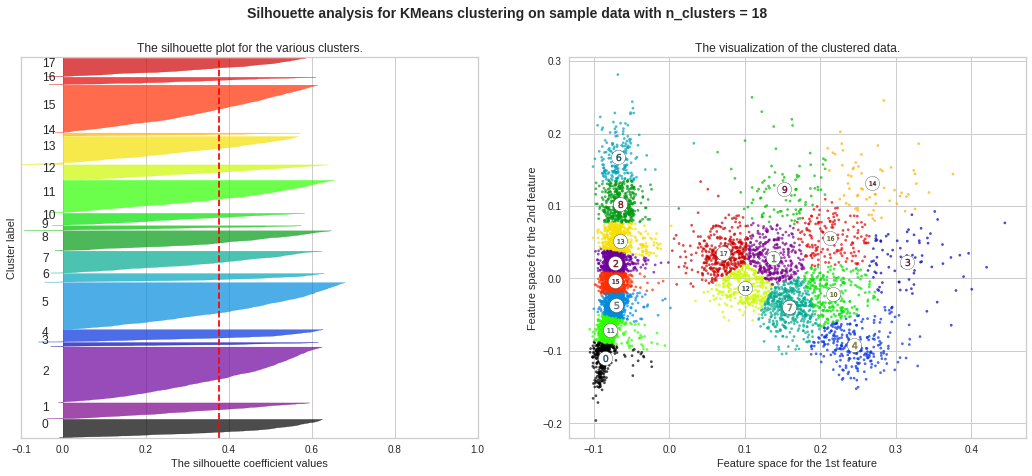

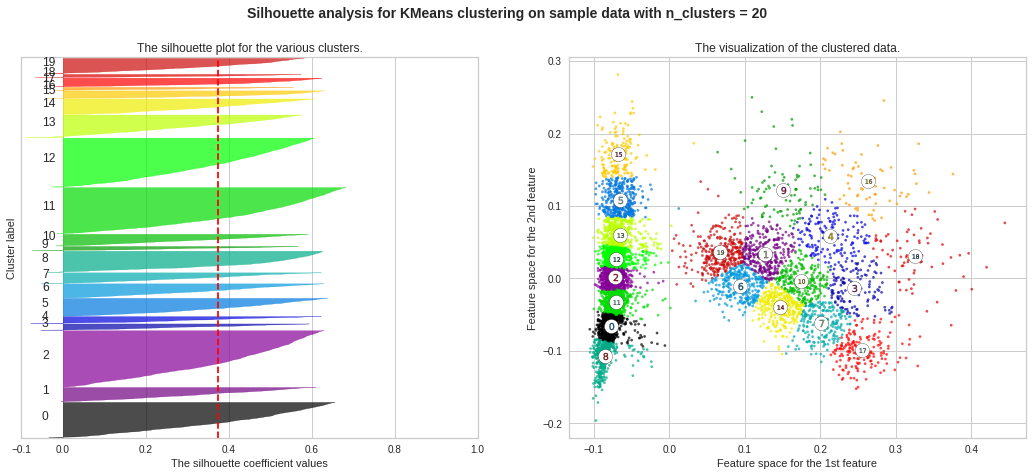

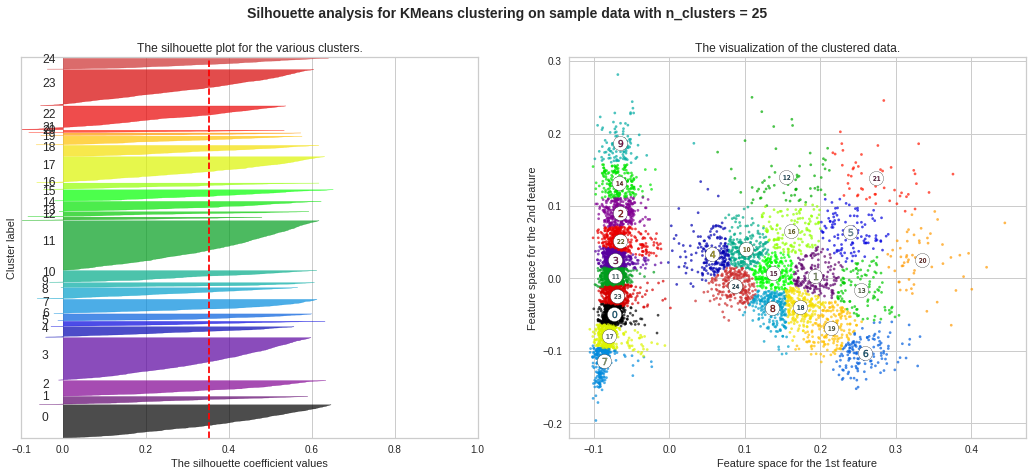

In [352]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,15,18,20,25]
silhouette_score_ = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
                c="white", alpha=1, s=200, edgecolor='k')

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
                    s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From the above silhoutte analysis, we can choose optimal k= 6



In [353]:
# Fitting the data into kmeans with k = 6
clst = KMeans(n_clusters=6, random_state=10)
clst_labels = clst.fit_predict(X_pca)

In [354]:
# printing silhouette score
sil_score = silhouette_score(X_pca, clst_labels)
print(f'The silhoutte score is {sil_score}')

The silhoutte score is 0.5001759759427156


In [355]:
# Creating a new column 'culster' which contains cluster number of particular movie/Tv show
df['cluster'] = clst_labels

In [356]:
# Inspecting the data
df.head()

title     type        country  release_year rating  movie_duration  \
0     3%  TV Show         Brazil          2020  TV-MA               0   
1   7:19    Movie         Mexico          2016  TV-MA              93   
2  23:59    Movie      Singapore          2011      R              78   
3      9    Movie  United States          2009  PG-13              80   
4     21    Movie  United States          2008  PG-13             123   

   month_added  num_of_seasons target_ages  \
0            8               4      Adults   
1           12               0      Adults   
2           12               0      Adults   
3           11               0       Teens   
4            1               0       Teens   

                                     combined_column  \
0  tv show unknown joão miguel , bianca comparato...   
1  movie jorge michel grau demián bichir , héctor...   
2  movie gilbert chan tedd chan , stella chung , ...   
3  movie shane acker elijah wood , john c. reilly...   
4  movie robert luketic jim sturgess , kevin spac...   

                                       tokenize_text  cluster  
0  tv show unknown joão miguel bianca comparato m...        5  
1  movi jorg michel grau demián bichir héctor bon...        3  
2  movi gilbert chan tedd chan stella chung henle...        3  
3  movi shane acker elijah wood john c reilli jen...        1  
4  movi robert luket jim sturgess kevin spacey ka...        1

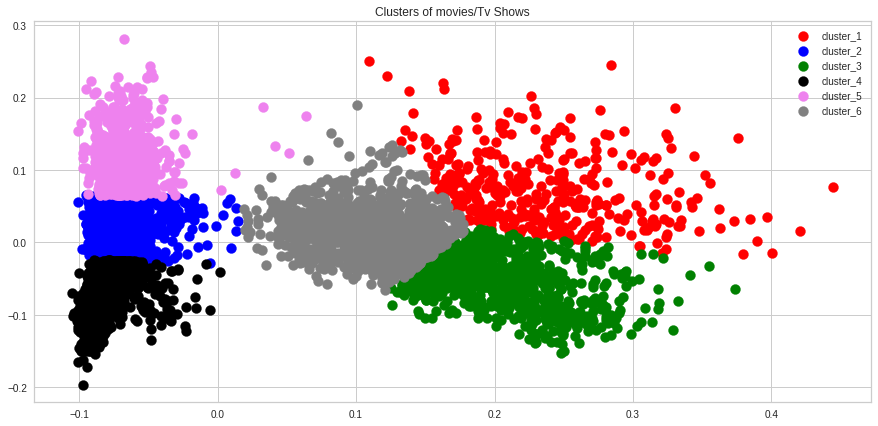

In [357]:
# Visualizing the clusters after fitting the data into K Means clustering
plt.figure(figsize = (15,7))
plt.scatter(X_pca[clst_labels==0].iloc[:,0],X_pca[clst_labels==0].iloc[:,1], s = 100, c = 'red', label = 'cluster_1')
plt.scatter(X_pca[clst_labels==1].iloc[:,0],X_pca[clst_labels==1].iloc[:,1], s = 100, c = 'blue', label = 'cluster_2')
plt.scatter(X_pca[clst_labels==2].iloc[:,0],X_pca[clst_labels==2].iloc[:,1], s = 100, c = 'green', label = 'cluster_3')
plt.scatter(X_pca[clst_labels==3].iloc[:,0],X_pca[clst_labels==3].iloc[:,1], s = 100, c = 'black', label = 'cluster_4')
plt.scatter(X_pca[clst_labels==4].iloc[:,0],X_pca[clst_labels==4].iloc[:,1], s = 100, c = 'violet', label = 'cluster_5')
plt.scatter(X_pca[clst_labels==5].iloc[:,0],X_pca[clst_labels==5].iloc[:,1], s = 100, c = 'grey', label = 'cluster_6')
plt.title('Clusters of movies/Tv Shows')
plt.legend()
plt.show()

## **Hierarchical Clustering**

In [358]:
# Importing necessary libraries
import scipy.cluster.hierarchy as shc
from sklearn.cluster import AgglomerativeClustering

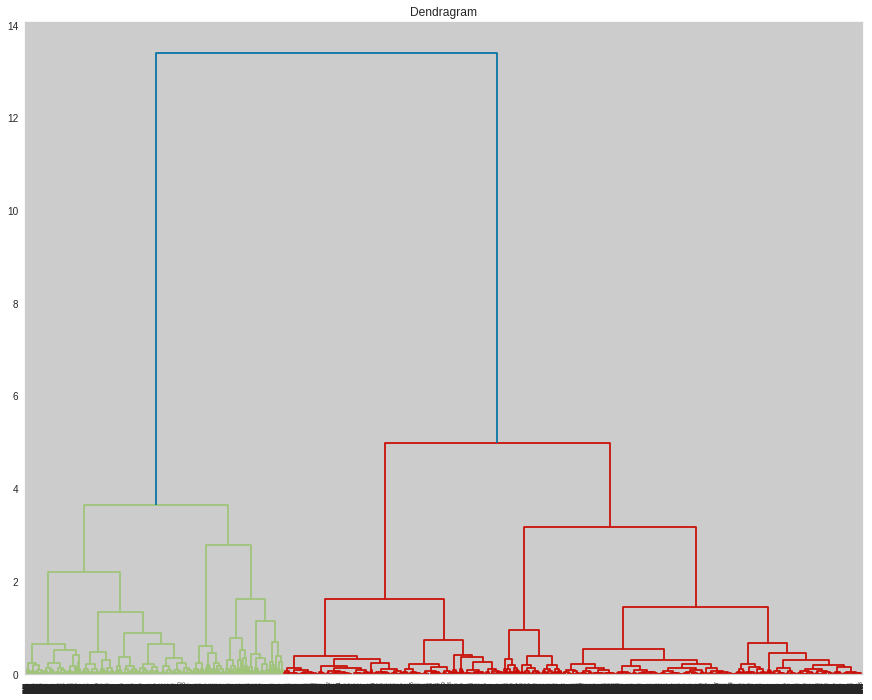

In [359]:
# Plotting dendrogram 
plt.figure(figsize = (15,12))
dendro = shc.dendrogram(shc.linkage(X_pca, method = 'ward'))
plt.title('Dendragram')
plt.show()

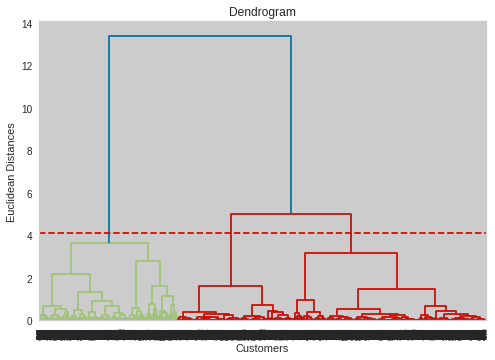

In [360]:
# Plotting dendrogram with threshold line 
dendrogram = shc.dendrogram(shc.linkage(X_pca, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.axhline(y=4.1, color='r', linestyle='--')
plt.show() # find largest vertical distance we can make without crossing any other horizontal line

For n_clusters = 2 The average silhouette_score is : 0.6515856557733527
For n_clusters = 3 The average silhouette_score is : 0.5049348034764315
For n_clusters = 4 The average silhouette_score is : 0.4566462473025287
For n_clusters = 5 The average silhouette_score is : 0.47505361318776246
For n_clusters = 6 The average silhouette_score is : 0.4796840304154439
For n_clusters = 7 The average silhouette_score is : 0.4657914050064339
For n_clusters = 8 The average silhouette_score is : 0.4709222350487077
For n_clusters = 9 The average silhouette_score is : 0.4133249011236784
For n_clusters = 10 The average silhouette_score is : 0.39521711592103576
For n_clusters = 15 The average silhouette_score is : 0.3753218813408507
For n_clusters = 18 The average silhouette_score is : 0.3413842922670702
For n_clusters = 20 The average silhouette_score is : 0.33649251374913464
For n_clusters = 25 The average silhouette_score is : 0.3042779746683571


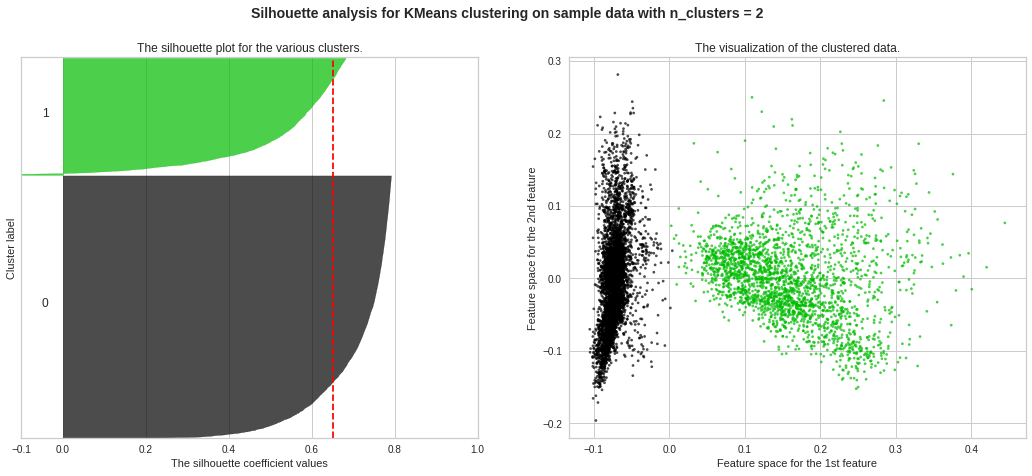

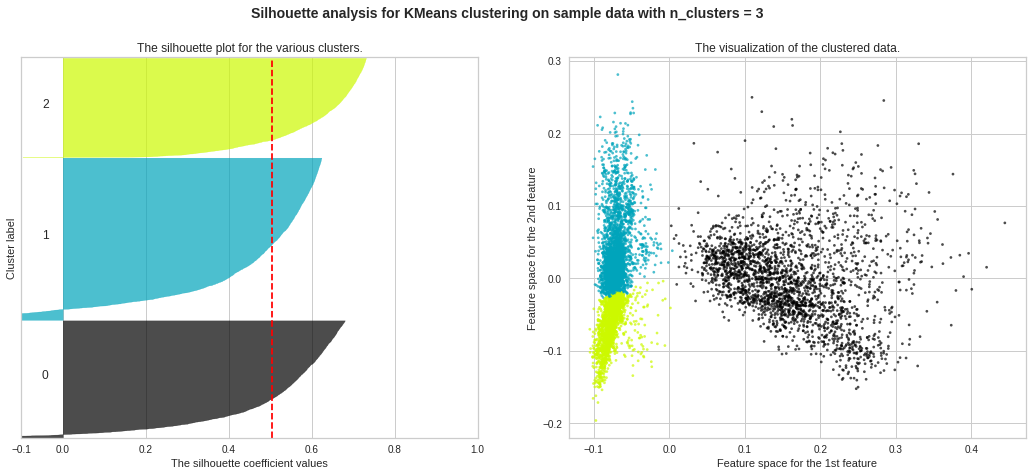

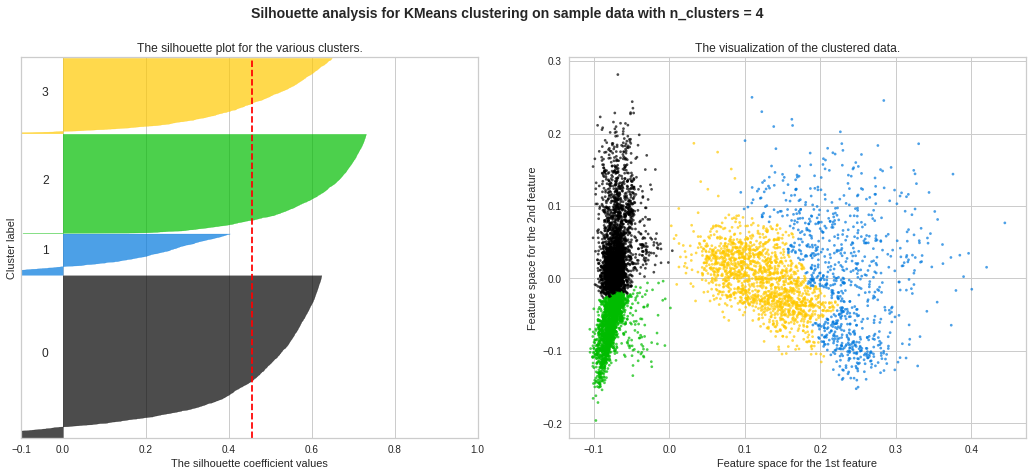

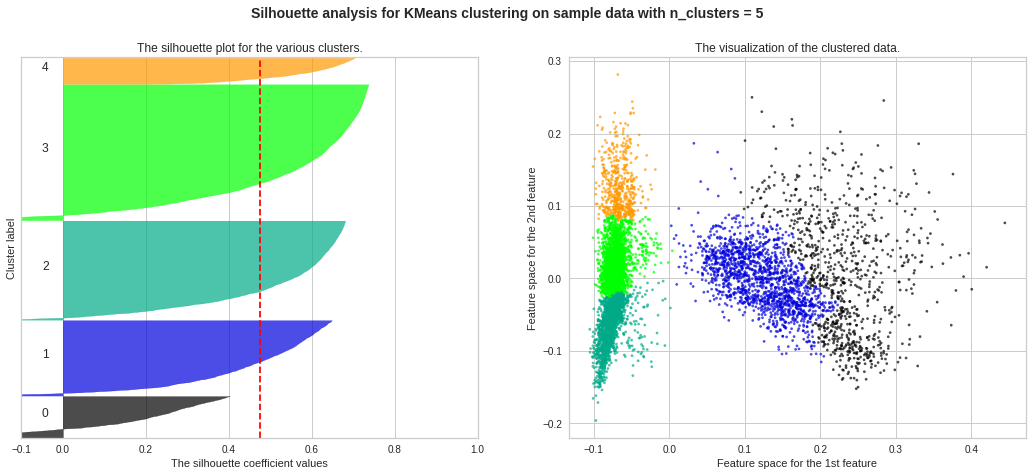

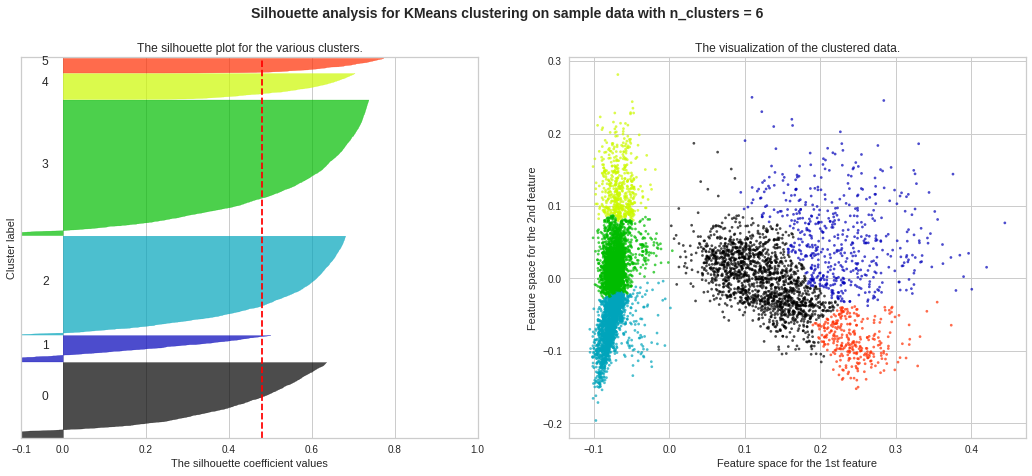

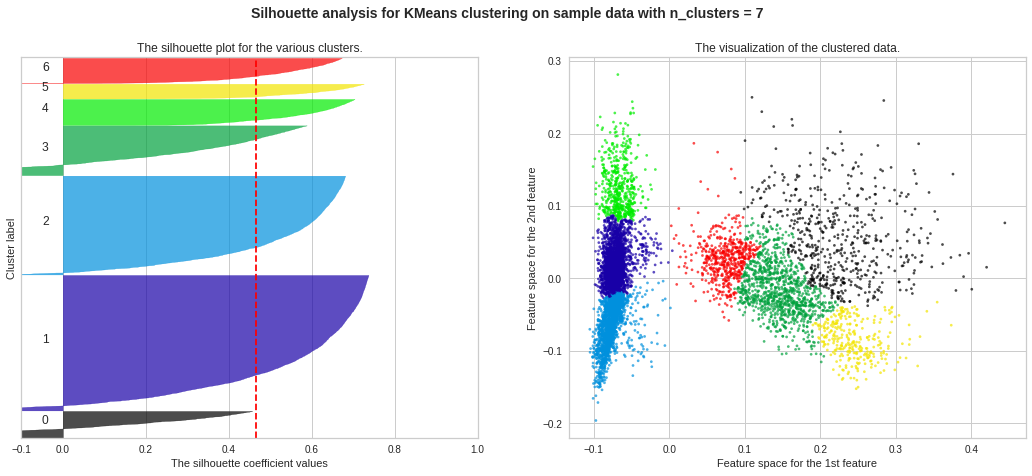

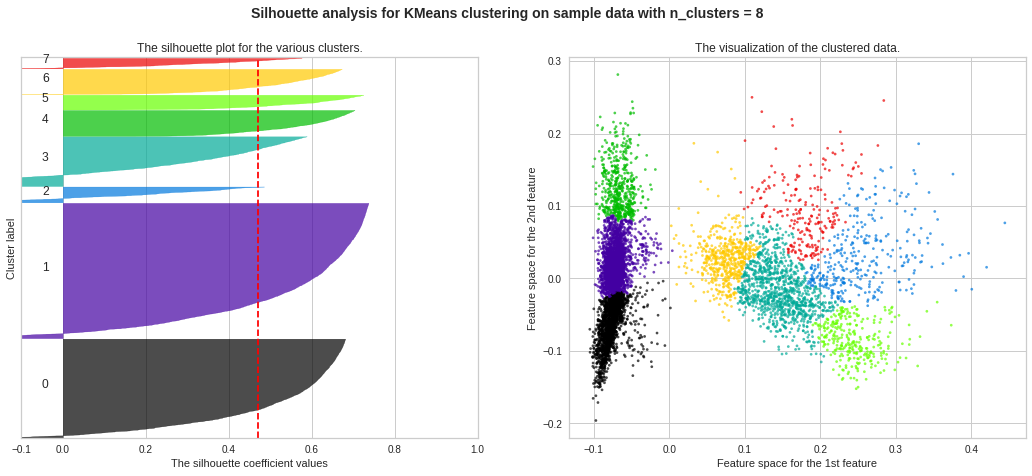

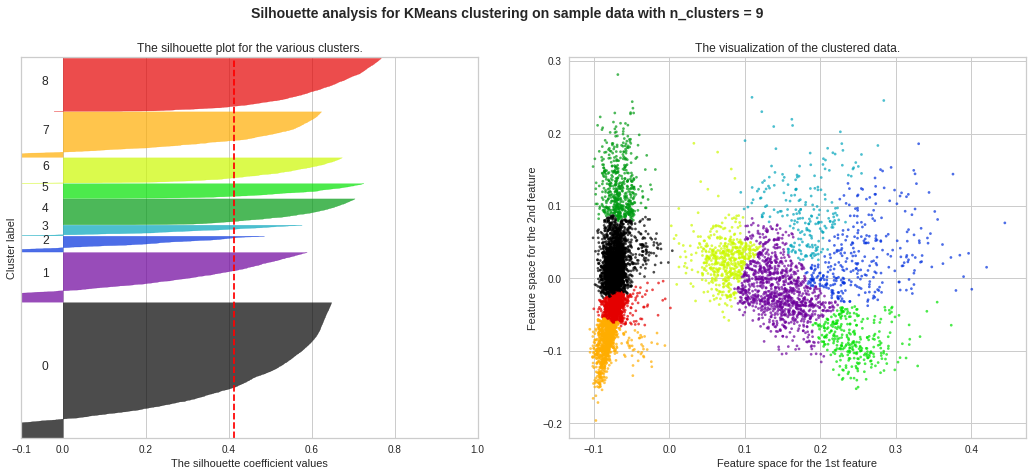

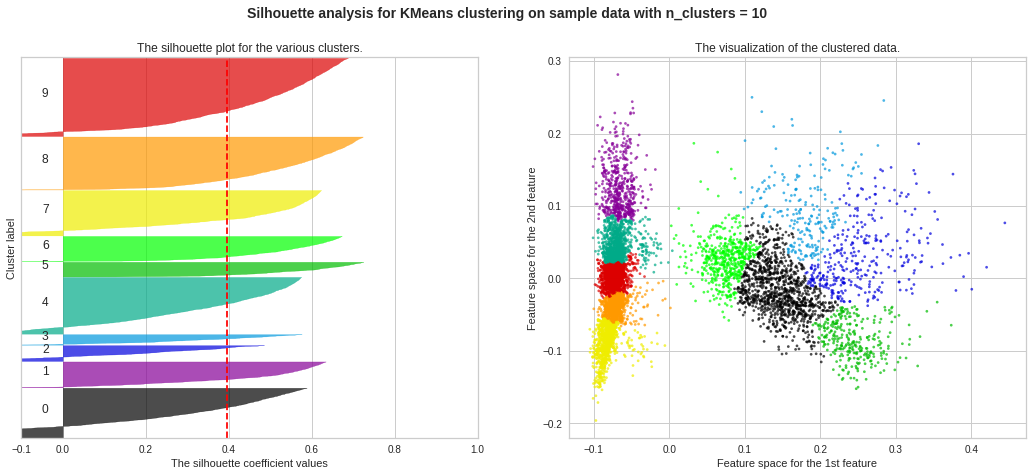

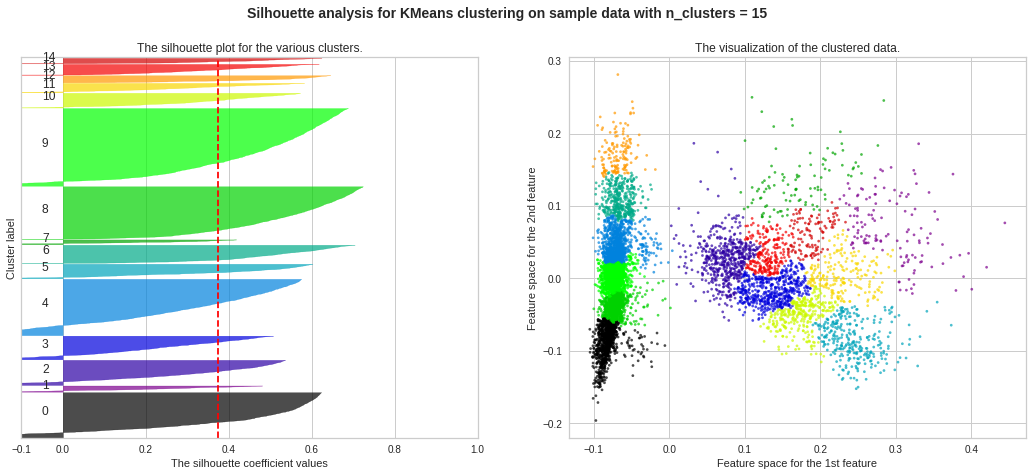

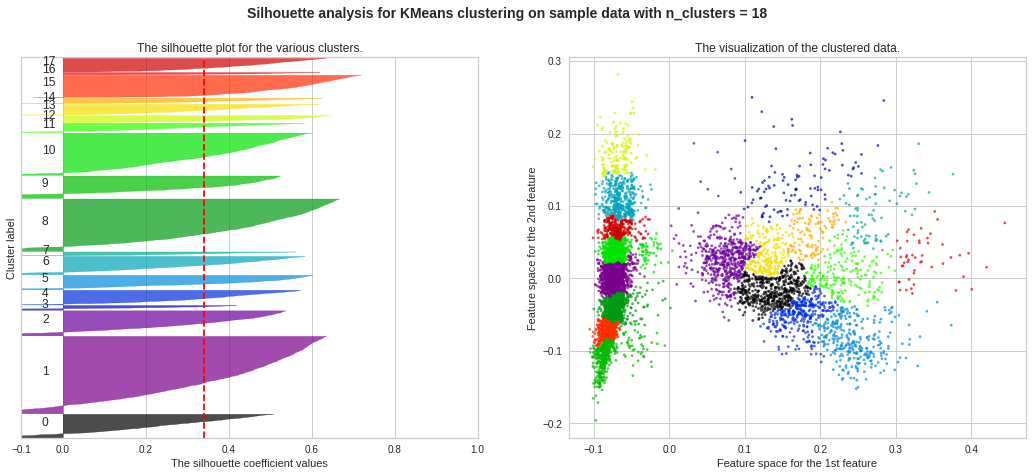

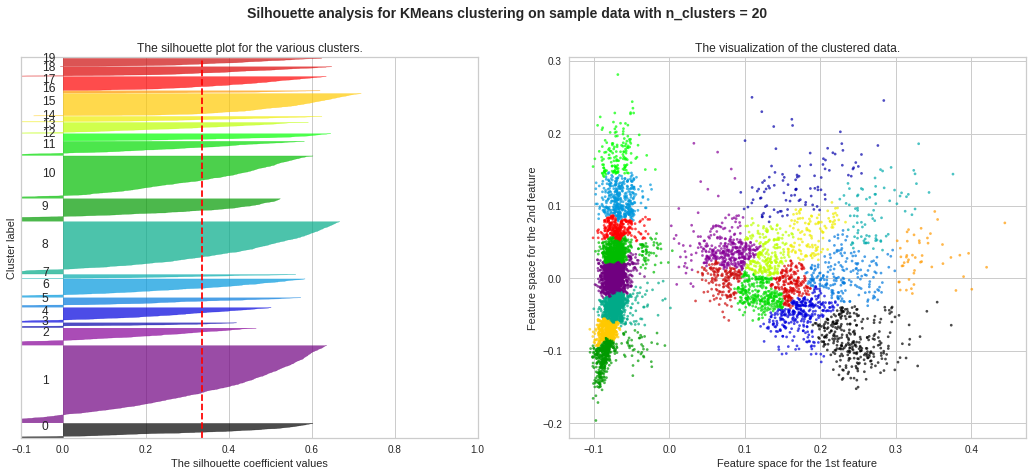

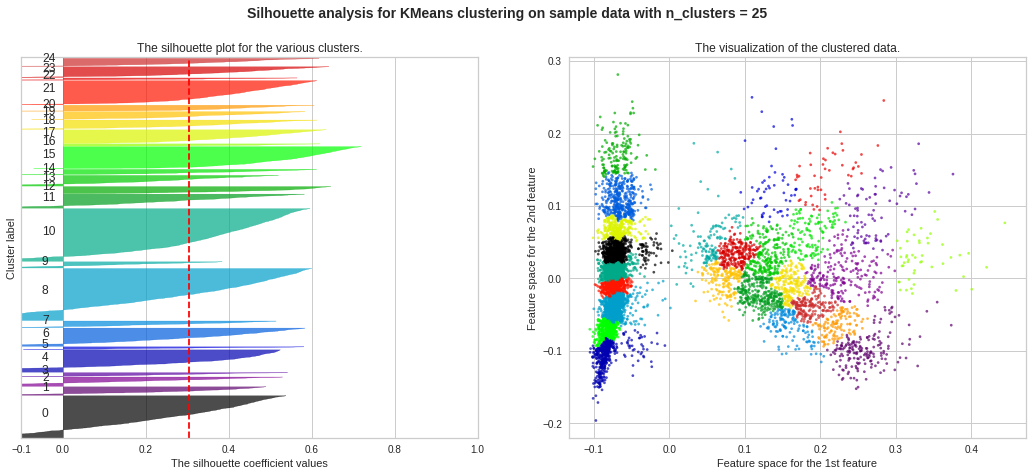

In [366]:
range_n_clusters = [2,3,4,5,6,7,8,9,10,15,18,20,25]
silhouette_score_ = []
for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X_pca) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = AgglomerativeClustering(n_clusters=n_clusters)
    cluster_labels = clusterer.fit_predict(X_pca)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X_pca, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X_pca, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.nipy_spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.nipy_spectral(cluster_labels.astype(float) /n_clusters)
    ax2.scatter(X_pca.iloc[:, 0], X_pca.iloc[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors, edgecolor='k')

    # Labeling the clusters
    # centers = clusterer.cluster_centers_
    # # Draw white circles at cluster centers
    # ax2.scatter(centers[:, 0], centers[:, 1], marker='o',
    #             c="white", alpha=1, s=200, edgecolor='k')

    # for i, c in enumerate(centers):
    #     ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1,
    #                 s=50, edgecolor='k')

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")
    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

plt.show()

From the above dendrogram and silhouette analysis, we can choose optimal k value as 3.

In [361]:
# Fitting the data into hierarchical clustering model
from sklearn.cluster import AgglomerativeClustering
hc = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc = hc.fit_predict(X_pca)

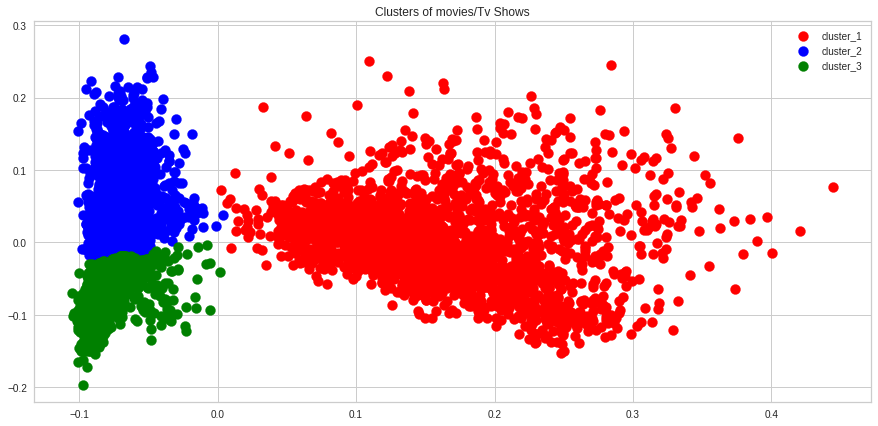

In [362]:
# Visualizing the clusters after fitting the data into Agglomerative Clustering model
plt.figure(figsize = (15, 7))
plt.scatter(X_pca[y_hc==0].iloc[:,0],X_pca[y_hc==0].iloc[:,1], s = 100, c = 'red', label = 'cluster_1')
plt.scatter(X_pca[y_hc==1].iloc[:,0],X_pca[y_hc==1].iloc[:,1], s = 100, c = 'blue', label = 'cluster_2')
plt.scatter(X_pca[y_hc==2].iloc[:,0],X_pca[y_hc==2].iloc[:,1], s = 100, c = 'green', label = 'cluster_3')
plt.title('Clusters of movies/Tv Shows')
plt.legend()
plt.show()

In [363]:
silhouette_score(X_pca, y_hc)

0.5049348034764315